# Programming Assignment 5 - Support Vector Machines 
In this programming assignment, you would use Support Vector Machines and Logistic Regression
for a classification problem. We are going to compare performance of both the algorithms on the same dataset with different values of parameters like type of kernel used, type of regularization techniques used (ridge/lasso) etc.

Do the assignment carefully, by understanding the structure of the code.

# Instructions :
You have to write a small report in a pdf file. You can use bullet points to discuss your results for every function of the assignment.<br>
For example, for data1.csv dataset, write which method gave you the best accuracy using which value of the parameter.<br>
Do not write explainations, just discuss your results / observations point to point. 


In [897]:
# Importing the libraries to be used:
import numpy as np
from numpy import random as r
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import PolynomialFeatures, StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, r2_score

In [898]:
def transform_and_split_data(data):
    X = data[:, :-1]
    y = data[:, -1]
    print(f'Original y hist: {np.histogram(y, range(int(y.max()) + 1))}')
    y = y - data[:, -1].min()
    y[y<=2] = -1.
    y[y==3] = 0.
    y[y>3] = 1.
    print(f'Current y hist: {np.histogram(y, [-0.5, 0.5, 1.5, 2.5])}')
    print(f'y min: {y.min()}, y max: {y.max()}')
    y_out_len = int(y.max()) + 1

    print(f'The shape of the wines dataset: {data.shape}')
    print(f'y[:10]:\n{y[:10]}')
    print(f'X[:10, :]:\n{X[:10, :]}')

    # Scale the dataset
    X_scale = StandardScaler()
    X = X_scale.fit_transform(X)
    print(f'ScaledX[:10, :]:\n{X[:10, :]}') # Looking the new features after scaling

    #Split the data into training and test set.  60% training and %40 test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    return X_train, y_train, X_test, y_test

### Confusion Matrix and Classification Analysis

In [899]:
def confusion_and_classification(y, y_hat):
    cm = confusion_matrix(y, y_hat, normalize='true')

    # Plot non-normalized confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='winter')
    plt.show()

    cr = classification_report(y, y_hat, zero_division=0)
    # accuracy
    print(cr[: cr.find('accuracy') - 6])
    print(f'\t\t R2 Score: {r2_score(y, y_hat)}\n')

# Support Vector Machines (SVM)
Now we will use the same dataset and try to find a classifier using SVM.
For more information about svm classifier, check the given link.
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# SVM using Linear Kernel.

In [900]:
# Complete the function below:
# In this function and next 2 functions, we are not passing the data matrices as parameters 
# because we can use global variables inside the functions.
def svm_linear(c, X_train, y_train, X_test, y_test, acc_train_svm_linear, acc_test_svm_linear):
    # TODO - Create an object of svm.SVC(probability = False, kernel = 'linear', C = c)
    svc_linear = svm.SVC(probability=False, kernel='linear', C=c)
    
    # Fit the classifier on the training set
    svc_linear.fit(X_train, y_train)

    acc_train = svc_linear.score(X_train, y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_linear.append(acc_train)
    print(f'SVM - Linear, Train Accuracy = {acc_train}, C={c}')

    # Find the prediction and accuracy on the training set
    Yhat_svc_linear_train = svc_linear.predict(X_train)
    # confusion_and_classification(y_train, Yhat_svc_linear_train)

    acc_test = svc_linear.score(X_test, y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_linear.append(acc_test)
    print(f'Test Accuracy = {acc_test}')

    # Find the prediction and accuracy on the test set
    Yhat_svc_linear_test = svc_linear.predict(X_test)
    confusion_and_classification(y_test, Yhat_svc_linear_test)

# SVM using Radial Basis Function(RBF) Kernel.

In [901]:
# Complete the function below:
# In this function and next 2 functions, we are not passing the data matrices as parameters 
# because we can use global variables inside the functions.
def svm_rbf(c, X_train, y_train, X_test, y_test, acc_train_svm_rbf, acc_test_svm_rbf):
    # Create an object of svm.SVC(probability = False, kernel = 'rbf', C = c)
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c, random_state=24)
    
    # Fit the classifier on the training set
    svc_rbf.fit(X_train, y_train)

    acc_train = svc_rbf.score(X_train, y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_rbf.append(acc_train)
    print(f'SVM - RBF, Train Accuracy = {acc_train}, C={c}')

    # Find the prediction and accuracy on the training set
    Yhat_svc_rbf_train = svc_rbf.predict(X_train)
    # confusion_and_classification(y_train, Yhat_svc_rbf_train)

    acc_test = svc_rbf.score(X_test, y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_rbf.append(acc_test)
    print(f'Test Accuracy = {acc_test}')

    # Find the prediction and accuracy on the test set
    Yhat_svc_rbf_test = svc_rbf.predict(X_test)
    confusion_and_classification(y_test, Yhat_svc_rbf_test)

# SVM using Polynomial Kernel.
Note: SVM with polynomial kernel can be sometimes very slow. If that is the case, use smaller size of training set. Instead of all 600 training examples, use less (say 300).

In [902]:
def svm_polynomial(c, X_train, y_train, X_test, y_test, acc_train_svm_poly, acc_test_svm_poly):
    # Create an object of svm.SVC(probability = False, kernel = 'poly', C = c)
    svc_polynomial = svm.SVC(probability = False, kernel = 'poly', C = c)
    
    # Fit the classifier on the training set
    # Use A and B to train and C and D to test.
    svc_polynomial.fit(X_train, y_train)

    acc_train = svc_polynomial.score(X_train, y_train)
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_poly.append(acc_train)
    print(f'SVM - Poly, Train Accuracy = {acc_train}, C={c}')

    # Find the prediction and accuracy on the training set
    Yhat_svc_poly_train = svc_polynomial.predict(X_train)
    # confusion_and_classification(y_train, Yhat_svc_poly_train)

    acc_test = svc_polynomial.score(X_test, y_test)
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_poly.append(acc_test)
    print(f'Test Accuracy = {acc_test}')

    # Find the prediction and accuracy on the test set
    Yhat_svc_poly_test = svc_polynomial.predict(X_test)
    confusion_and_classification(y_test, Yhat_svc_poly_test)

In [903]:
def train_and_plot(X_train, y_train, X_test, y_test, c_svm_linear, c_svm_rbf, c_svm_poly):
    # Linear
    acc_train_svm_linear = []
    acc_test_svm_linear = []
    # Call the above function i.e. logreg_model with different values of parameter 'c'.
    # c_svm_linear = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    for c in c_svm_linear:
        svm_linear(c, X_train, y_train, X_test, y_test, acc_train_svm_linear, acc_test_svm_linear)

    # Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
    # Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
    plt.plot(c_svm_linear, acc_train_svm_linear, color='red', label='Training Accuracy')
    plt.plot(c_svm_linear, acc_test_svm_linear, color='green', label='Test Accuracy')
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.title('Linear - Training and Test accuracy v/s c')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Radial Basis Function
    acc_train_svm_rbf = []
    acc_test_svm_rbf = []
    # c_svm_rbf = [0.1, 1, 10, 100, 1000]
    for c in c_svm_rbf:
        svm_rbf(c, X_train, y_train, X_test, y_test, acc_train_svm_rbf, acc_test_svm_rbf)

    # Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
    # Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
    plt.plot(c_svm_rbf, acc_train_svm_rbf, color='red', label='Training Accuracy')
    plt.plot(c_svm_rbf, acc_test_svm_rbf, color='green', label='Test Accuracy')
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.title('RBF - Training and Test accuracy v/s c')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()



    # # Poly
    acc_train_svm_poly = []
    acc_test_svm_poly = []
    # c_svm_poly = [0.1, 1, 10, 100, 1000]
    for c in c_svm_poly:
        svm_polynomial(c, X_train, y_train, X_test, y_test, acc_train_svm_poly, acc_test_svm_poly)

    # Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
    # Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
    plt.plot(c_svm_poly, acc_train_svm_poly, color='red', label='Training Accuracy')
    plt.plot(c_svm_poly, acc_test_svm_poly, color='green', label='Test Accuracy')
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.title('Poly - Training and Test accuracy v/s c')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

In [904]:
df_red = pd.read_csv('winequality-red.csv', sep=';')
data_red = df_red.to_numpy()

df_white = pd.read_csv('winequality-white.csv', sep=';')
data_white = df_white.to_numpy()

data_all = np.vstack((data_red, data_white))

rs = r.RandomState(42)
r.shuffle(data_red)
r.shuffle(data_white)
r.shuffle(data_all)

# Train Red Wines Data

In [905]:
X_train, y_train, X_test, y_test = transform_and_split_data(data_red)

Original y hist: (array([  0,   0,   0,  10,  53, 681, 638, 217]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]))
Current y hist: (array([638, 217,   0]), array([-0.5,  0.5,  1.5,  2.5]))
y min: -1.0, y max: 1.0
The shape of the wines dataset: (1599, 12)
y[:10]:
[-1.  1.  0. -1. -1. -1. -1.  0.  0.  0.]
X[:10, :]:
[[8.1000e+00 7.8500e-01 5.2000e-01 2.0000e+00 1.2200e-01 3.7000e+01
  1.5300e+02 9.9690e-01 3.2100e+00 6.9000e-01 9.3000e+00]
 [7.2000e+00 3.8000e-01 3.1000e-01 2.0000e+00 5.6000e-02 1.5000e+01
  2.9000e+01 9.9472e-01 3.2300e+00 7.6000e-01 1.1300e+01]
 [9.6000e+00 4.2000e-01 3.5000e-01 2.1000e+00 8.3000e-02 1.7000e+01
  3.8000e+01 9.9622e-01 3.2300e+00 6.6000e-01 1.1100e+01]
 [6.3000e+00 3.9000e-01 8.0000e-02 1.7000e+00 6.6000e-02 3.0000e+00
  2.0000e+01 9.9540e-01 3.3400e+00 5.8000e-01 9.4000e+00]
 [8.4000e+00 6.6500e-01 6.1000e-01 2.0000e+00 1.1200e-01 1.3000e+01
  9.5000e+01 9.9700e-01 3.1600e+00 5.4000e-01 9.1000e+00]
 [1.2200e+01 4.5000e-01 4.9000e-01 1.4000e+00 7.5000e-02 3.0000e+

SVM - Linear, Train Accuracy = 0.6129788897576232, C=0.06
Test Accuracy = 0.609375


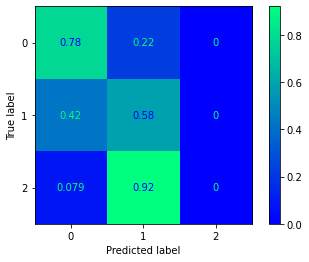

              precision    recall  f1-score   support

        -1.0       0.69      0.78      0.73       158
         0.0       0.51      0.58      0.54       124
         1.0       0.00      0.00      0.00        38
		 R2 Score: 0.11258278145695366

SVM - Linear, Train Accuracy = 0.6129788897576232, C=0.0680892420526407
Test Accuracy = 0.60625


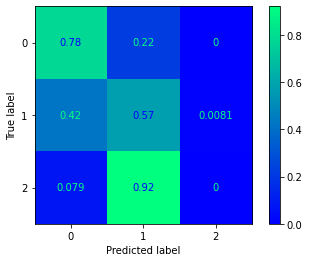

              precision    recall  f1-score   support

        -1.0       0.69      0.78      0.73       158
         0.0       0.50      0.57      0.54       124
         1.0       0.00      0.00      0.00        38
		 R2 Score: 0.10596026490066224

SVM - Linear, Train Accuracy = 0.616106333072713, C=0.07726908138838487
Test Accuracy = 0.615625


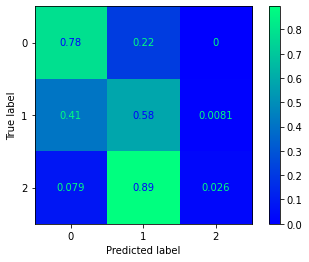

              precision    recall  f1-score   support

        -1.0       0.70      0.78      0.74       158
         0.0       0.51      0.58      0.55       124
         1.0       0.50      0.03      0.05        38
		 R2 Score: 0.1258278145695364

SVM - Linear, Train Accuracy = 0.6145426114151681, C=0.08768655309731553
Test Accuracy = 0.61875


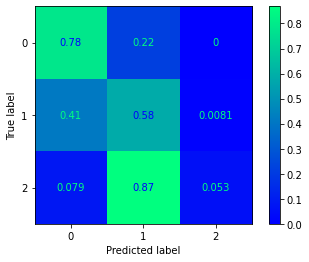

              precision    recall  f1-score   support

        -1.0       0.70      0.78      0.74       158
         0.0       0.52      0.58      0.55       124
         1.0       0.67      0.05      0.10        38
		 R2 Score: 0.13245033112582782

SVM - Linear, Train Accuracy = 0.6168881939014855, C=0.09950851564341409
Test Accuracy = 0.621875


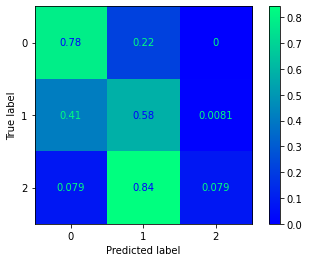

              precision    recall  f1-score   support

        -1.0       0.70      0.78      0.74       158
         0.0       0.52      0.58      0.55       124
         1.0       0.75      0.08      0.14        38
		 R2 Score: 0.13907284768211925

SVM - Linear, Train Accuracy = 0.6200156372165755, C=0.11292432346572343
Test Accuracy = 0.625


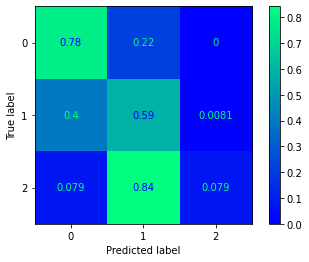

              precision    recall  f1-score   support

        -1.0       0.70      0.78      0.74       158
         0.0       0.53      0.59      0.56       124
         1.0       0.75      0.08      0.14        38
		 R2 Score: 0.14569536423841056

SVM - Linear, Train Accuracy = 0.6278342455043002, C=0.12814885990147223
Test Accuracy = 0.628125


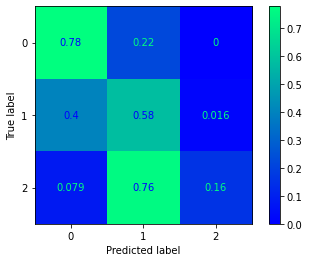

              precision    recall  f1-score   support

        -1.0       0.70      0.78      0.74       158
         0.0       0.53      0.58      0.55       124
         1.0       0.75      0.16      0.26        38
		 R2 Score: 0.152317880794702

SVM - Linear, Train Accuracy = 0.63721657544957, C=0.14542597901002138
Test Accuracy = 0.63125


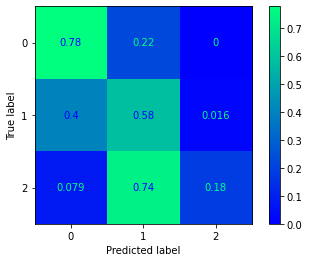

              precision    recall  f1-score   support

        -1.0       0.70      0.78      0.74       158
         0.0       0.53      0.58      0.56       124
         1.0       0.78      0.18      0.30        38
		 R2 Score: 0.1589403973509934

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.1650324114259265
Test Accuracy = 0.63125


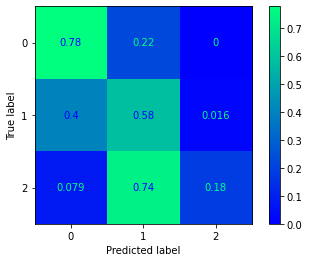

              precision    recall  f1-score   support

        -1.0       0.70      0.78      0.74       158
         0.0       0.53      0.58      0.56       124
         1.0       0.78      0.18      0.30        38
		 R2 Score: 0.1589403973509934

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.1872821968018482
Test Accuracy = 0.63125


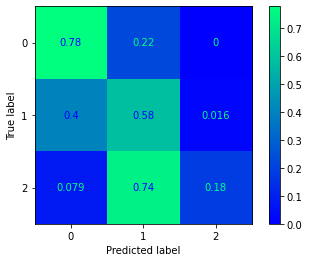

              precision    recall  f1-score   support

        -1.0       0.70      0.78      0.74       158
         0.0       0.53      0.58      0.56       124
         1.0       0.78      0.18      0.30        38
		 R2 Score: 0.1589403973509934

SVM - Linear, Train Accuracy = 0.63721657544957, C=0.2125317138365222
Test Accuracy = 0.63125


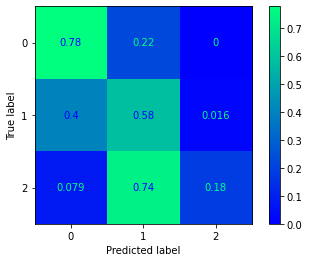

              precision    recall  f1-score   support

        -1.0       0.70      0.78      0.74       158
         0.0       0.53      0.58      0.56       124
         1.0       0.78      0.18      0.30        38
		 R2 Score: 0.1589403973509934

SVM - Linear, Train Accuracy = 0.6379984362783424, C=0.2411853884546254
Test Accuracy = 0.63125


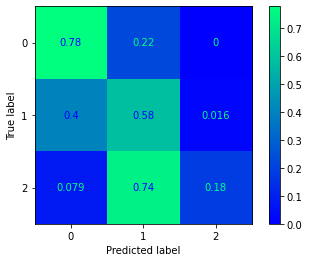

              precision    recall  f1-score   support

        -1.0       0.70      0.78      0.74       158
         0.0       0.53      0.58      0.56       124
         1.0       0.78      0.18      0.30        38
		 R2 Score: 0.1589403973509934

SVM - Linear, Train Accuracy = 0.6379984362783424, C=0.2737021715674527
Test Accuracy = 0.63125


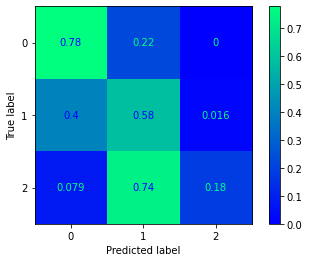

              precision    recall  f1-score   support

        -1.0       0.70      0.78      0.74       158
         0.0       0.53      0.58      0.56       124
         1.0       0.78      0.18      0.30        38
		 R2 Score: 0.1589403973509934

SVM - Linear, Train Accuracy = 0.63721657544957, C=0.3106028901698279
Test Accuracy = 0.63125


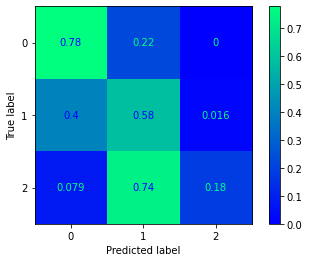

              precision    recall  f1-score   support

        -1.0       0.70      0.78      0.74       158
         0.0       0.53      0.58      0.56       124
         1.0       0.78      0.18      0.30        38
		 R2 Score: 0.1589403973509934

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.352478589517053
Test Accuracy = 0.63125


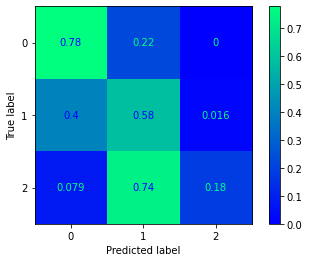

              precision    recall  f1-score   support

        -1.0       0.70      0.78      0.74       158
         0.0       0.53      0.58      0.56       124
         1.0       0.78      0.18      0.30        38
		 R2 Score: 0.1589403973509934

SVM - Linear, Train Accuracy = 0.6348709929632526, C=0.4
Test Accuracy = 0.63125


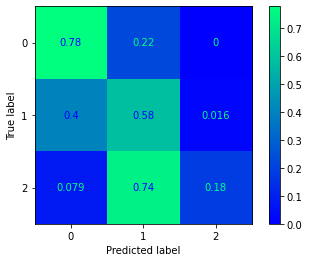

              precision    recall  f1-score   support

        -1.0       0.70      0.78      0.74       158
         0.0       0.53      0.58      0.56       124
         1.0       0.78      0.18      0.30        38
		 R2 Score: 0.1589403973509934



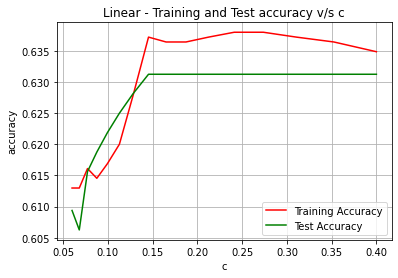

SVM - RBF, Train Accuracy = 0.709147771696638, C=1.0
Test Accuracy = 0.653125


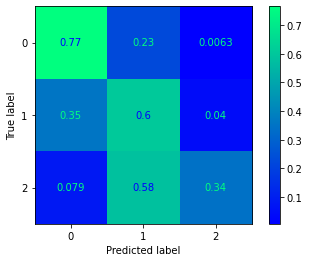

              precision    recall  f1-score   support

        -1.0       0.72      0.77      0.74       158
         0.0       0.56      0.60      0.58       124
         1.0       0.68      0.34      0.46        38
		 R2 Score: 0.1854304635761589

SVM - RBF, Train Accuracy = 0.7114933541829555, C=1.2324856054625426
Test Accuracy = 0.646875


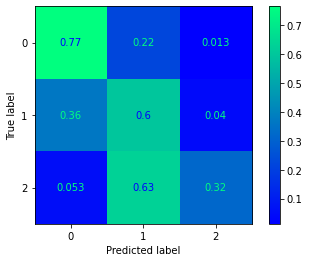

              precision    recall  f1-score   support

        -1.0       0.72      0.77      0.74       158
         0.0       0.56      0.60      0.58       124
         1.0       0.63      0.32      0.42        38
		 R2 Score: 0.17218543046357615

SVM - RBF, Train Accuracy = 0.7200938232994527, C=1.5190207676723702
Test Accuracy = 0.653125


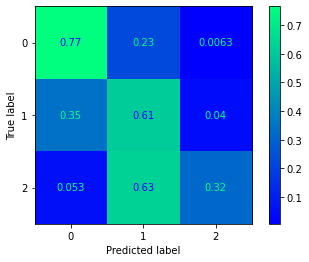

              precision    recall  f1-score   support

        -1.0       0.73      0.77      0.75       158
         0.0       0.56      0.61      0.58       124
         1.0       0.67      0.32      0.43        38
		 R2 Score: 0.20529801324503316

SVM - RBF, Train Accuracy = 0.7302580140734949, C=1.8721712305548572
Test Accuracy = 0.6625


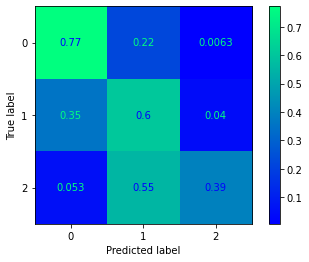

              precision    recall  f1-score   support

        -1.0       0.73      0.77      0.75       158
         0.0       0.57      0.60      0.59       124
         1.0       0.71      0.39      0.51        38
		 R2 Score: 0.22516556291390732

SVM - RBF, Train Accuracy = 0.7388584831899921, C=2.3074240926199567
Test Accuracy = 0.665625


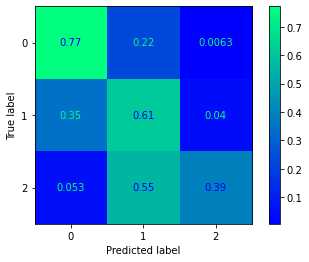

              precision    recall  f1-score   support

        -1.0       0.73      0.77      0.75       158
         0.0       0.58      0.61      0.59       124
         1.0       0.71      0.39      0.51        38
		 R2 Score: 0.23178807947019864

SVM - RBF, Train Accuracy = 0.7474589523064894, C=2.8438669798515654
Test Accuracy = 0.65625


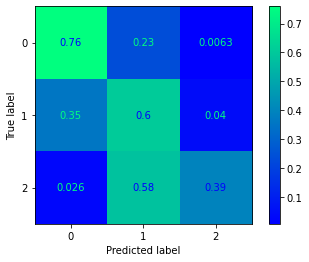

              precision    recall  f1-score   support

        -1.0       0.73      0.76      0.74       158
         0.0       0.56      0.60      0.58       124
         1.0       0.71      0.39      0.51        38
		 R2 Score: 0.23178807947019864

SVM - RBF, Train Accuracy = 0.766223612197029, C=3.5050251165172885
Test Accuracy = 0.65625


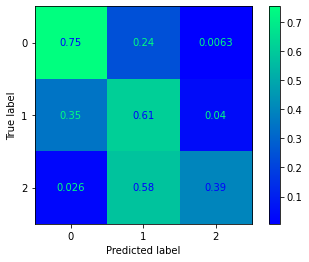

              precision    recall  f1-score   support

        -1.0       0.73      0.75      0.74       158
         0.0       0.56      0.61      0.58       124
         1.0       0.71      0.39      0.51        38
		 R2 Score: 0.23178807947019864

SVM - RBF, Train Accuracy = 0.7763878029710711, C=4.31989300289223
Test Accuracy = 0.665625


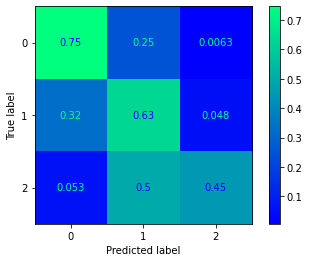

              precision    recall  f1-score   support

        -1.0       0.74      0.75      0.74       158
         0.0       0.57      0.63      0.60       124
         1.0       0.71      0.45      0.55        38
		 R2 Score: 0.23178807947019864

SVM - RBF, Train Accuracy = 0.7928068803752932, C=5.32420594320303
Test Accuracy = 0.665625


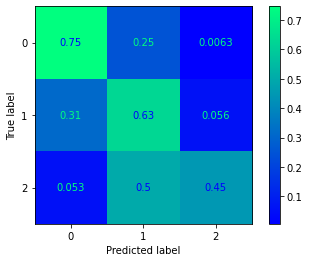

              precision    recall  f1-score   support

        -1.0       0.74      0.75      0.74       158
         0.0       0.57      0.63      0.60       124
         1.0       0.68      0.45      0.54        38
		 R2 Score: 0.23178807947019864

SVM - RBF, Train Accuracy = 0.8014073494917905, C=6.562007185515855
Test Accuracy = 0.66875


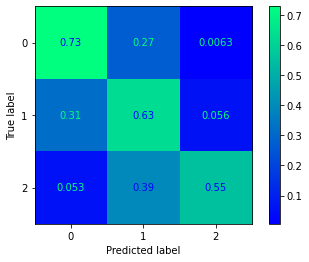

              precision    recall  f1-score   support

        -1.0       0.74      0.73      0.73       158
         0.0       0.58      0.63      0.60       124
         1.0       0.72      0.55      0.63        38
		 R2 Score: 0.23841059602649006

SVM - RBF, Train Accuracy = 0.8107896794370602, C=8.087579399090064
Test Accuracy = 0.684375


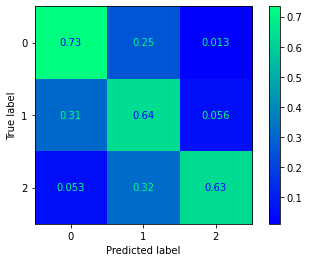

              precision    recall  f1-score   support

        -1.0       0.74      0.73      0.74       158
         0.0       0.60      0.64      0.62       124
         1.0       0.73      0.63      0.68        38
		 R2 Score: 0.2516556291390728

SVM - RBF, Train Accuracy = 0.8193901485535575, C=9.967825192413903
Test Accuracy = 0.66875


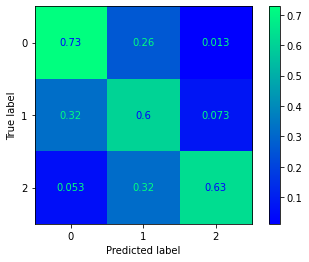

              precision    recall  f1-score   support

        -1.0       0.73      0.73      0.73       158
         0.0       0.59      0.60      0.60       124
         1.0       0.69      0.63      0.66        38
		 R2 Score: 0.2185430463576159

SVM - RBF, Train Accuracy = 0.8232994526974199, C=12.285201067417033
Test Accuracy = 0.66875


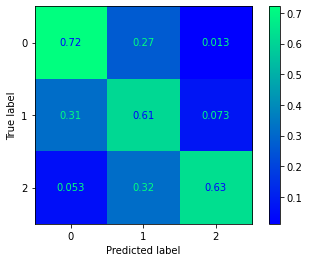

              precision    recall  f1-score   support

        -1.0       0.74      0.72      0.73       158
         0.0       0.58      0.61      0.60       124
         1.0       0.69      0.63      0.66        38
		 R2 Score: 0.2185430463576159

SVM - RBF, Train Accuracy = 0.835027365129007, C=15.141333475804554
Test Accuracy = 0.659375


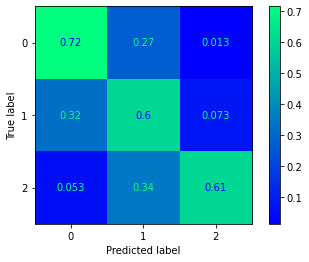

              precision    recall  f1-score   support

        -1.0       0.73      0.72      0.72       158
         0.0       0.57      0.60      0.59       124
         1.0       0.68      0.61      0.64        38
		 R2 Score: 0.19867549668874174

SVM - RBF, Train Accuracy = 0.8420641125879593, C=18.66147555643725
Test Accuracy = 0.671875


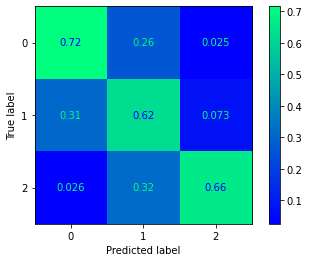

              precision    recall  f1-score   support

        -1.0       0.74      0.72      0.73       158
         0.0       0.59      0.62      0.61       124
         1.0       0.66      0.66      0.66        38
		 R2 Score: 0.20529801324503316

SVM - RBF, Train Accuracy = 0.853010164190774, C=23.0
Test Accuracy = 0.671875


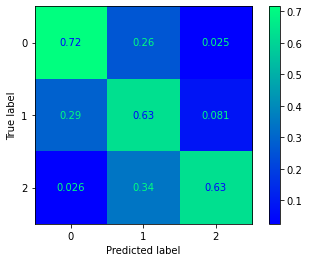

              precision    recall  f1-score   support

        -1.0       0.75      0.72      0.73       158
         0.0       0.59      0.63      0.61       124
         1.0       0.63      0.63      0.63        38
		 R2 Score: 0.20529801324503316



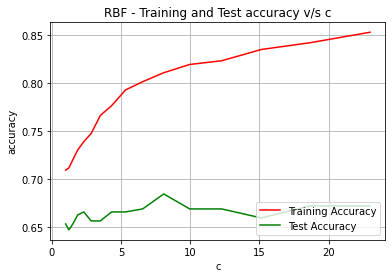

SVM - Poly, Train Accuracy = 0.596559812353401, C=0.1
Test Accuracy = 0.590625


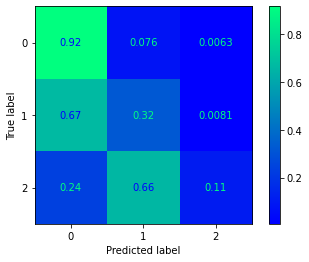

              precision    recall  f1-score   support

        -1.0       0.61      0.92      0.73       158
         0.0       0.52      0.32      0.40       124
         1.0       0.67      0.11      0.18        38
		 R2 Score: -0.0662251655629138

SVM - Poly, Train Accuracy = 0.6137607505863957, C=0.151332195791627
Test Accuracy = 0.596875


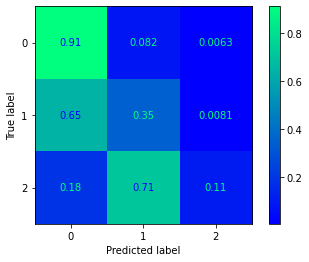

              precision    recall  f1-score   support

        -1.0       0.62      0.91      0.74       158
         0.0       0.52      0.35      0.42       124
         1.0       0.67      0.11      0.18        38
		 R2 Score: -0.013245033112582849

SVM - Poly, Train Accuracy = 0.6356528537920251, C=0.22901433483115327
Test Accuracy = 0.60625


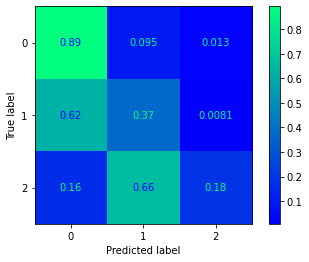

              precision    recall  f1-score   support

        -1.0       0.63      0.89      0.74       158
         0.0       0.53      0.37      0.44       124
         1.0       0.70      0.18      0.29        38
		 R2 Score: 0.0066225165562914245

SVM - Poly, Train Accuracy = 0.6520719311962471, C=0.3465724215775732
Test Accuracy = 0.615625


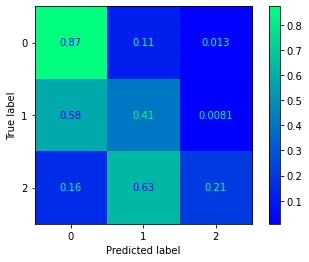

              precision    recall  f1-score   support

        -1.0       0.64      0.87      0.74       158
         0.0       0.55      0.41      0.47       124
         1.0       0.73      0.21      0.33        38
		 R2 Score: 0.026490066225165587

SVM - Poly, Train Accuracy = 0.6724003127443315, C=0.524475655581556
Test Accuracy = 0.640625


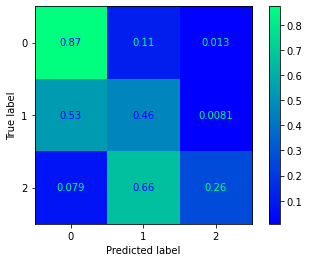

              precision    recall  f1-score   support

        -1.0       0.67      0.87      0.76       158
         0.0       0.57      0.46      0.51       124
         1.0       0.77      0.26      0.39        38
		 R2 Score: 0.13907284768211925

SVM - Poly, Train Accuracy = 0.6958561376075059, C=0.7937005259840996
Test Accuracy = 0.634375


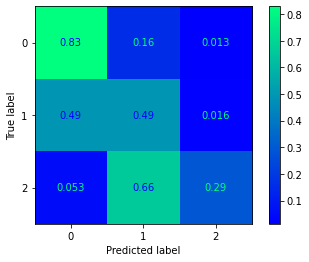

              precision    recall  f1-score   support

        -1.0       0.68      0.83      0.74       158
         0.0       0.55      0.49      0.52       124
         1.0       0.73      0.29      0.42        38
		 R2 Score: 0.14569536423841056

SVM - Poly, Train Accuracy = 0.7122752150117279, C=1.201124433981431
Test Accuracy = 0.65625


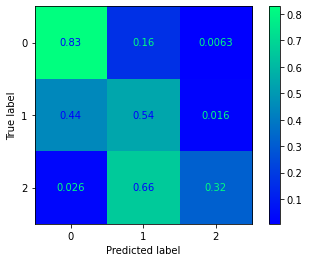

              precision    recall  f1-score   support

        -1.0       0.70      0.83      0.76       158
         0.0       0.57      0.54      0.55       124
         1.0       0.80      0.32      0.45        38
		 R2 Score: 0.23178807947019864

SVM - Poly, Train Accuracy = 0.7333854573885848, C=1.8176879801338506
Test Accuracy = 0.653125


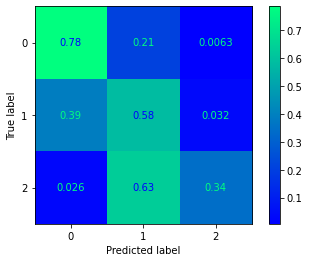

              precision    recall  f1-score   support

        -1.0       0.72      0.78      0.75       158
         0.0       0.56      0.58      0.57       124
         1.0       0.72      0.34      0.46        38
		 R2 Score: 0.22516556291390732

SVM - Poly, Train Accuracy = 0.7537138389366693, C=2.7507471329770294
Test Accuracy = 0.653125


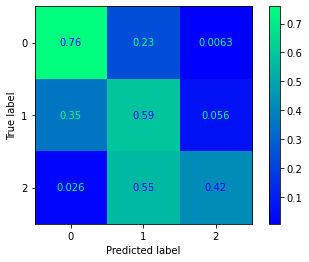

              precision    recall  f1-score   support

        -1.0       0.73      0.76      0.74       158
         0.0       0.56      0.59      0.57       124
         1.0       0.67      0.42      0.52        38
		 R2 Score: 0.22516556291390732

SVM - Poly, Train Accuracy = 0.7537138389366693, C=4.162766037009366
Test Accuracy = 0.65625


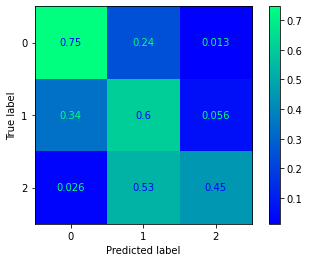

              precision    recall  f1-score   support

        -1.0       0.73      0.75      0.74       158
         0.0       0.56      0.60      0.58       124
         1.0       0.65      0.45      0.53        38
		 R2 Score: 0.21192052980132448

SVM - Poly, Train Accuracy = 0.7599687255668491, C=6.2996052494743635
Test Accuracy = 0.653125


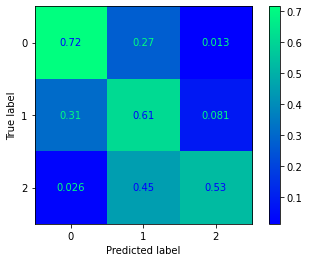

              precision    recall  f1-score   support

        -1.0       0.74      0.72      0.73       158
         0.0       0.56      0.61      0.58       124
         1.0       0.62      0.53      0.57        38
		 R2 Score: 0.20529801324503316

SVM - Poly, Train Accuracy = 0.7724784988272088, C=9.533330950234157
Test Accuracy = 0.678125


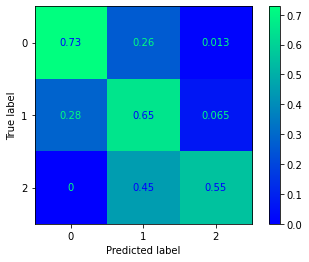

              precision    recall  f1-score   support

        -1.0       0.77      0.73      0.75       158
         0.0       0.58      0.65      0.62       124
         1.0       0.68      0.55      0.61        38
		 R2 Score: 0.2781456953642384

SVM - Poly, Train Accuracy = 0.784206411258796, C=14.426999059072134
Test Accuracy = 0.665625


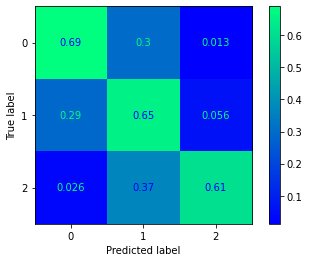

              precision    recall  f1-score   support

        -1.0       0.75      0.69      0.72       158
         0.0       0.57      0.65      0.61       124
         1.0       0.72      0.61      0.66        38
		 R2 Score: 0.23178807947019864

SVM - Poly, Train Accuracy = 0.7896794370602033, C=21.832694462931222
Test Accuracy = 0.66875


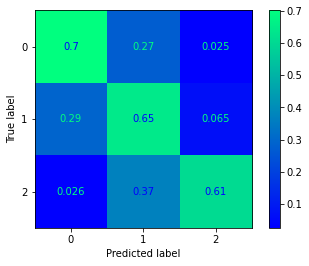

              precision    recall  f1-score   support

        -1.0       0.75      0.70      0.73       158
         0.0       0.58      0.65      0.61       124
         1.0       0.66      0.61      0.63        38
		 R2 Score: 0.19867549668874174

SVM - Poly, Train Accuracy = 0.8053166536356529, C=33.039895931230774
Test Accuracy = 0.659375


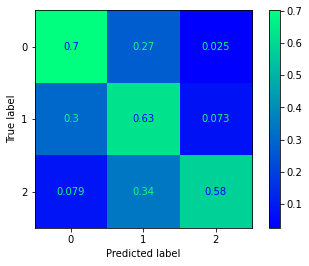

              precision    recall  f1-score   support

        -1.0       0.74      0.70      0.72       158
         0.0       0.58      0.63      0.60       124
         1.0       0.63      0.58      0.60        38
		 R2 Score: 0.13907284768211925

SVM - Poly, Train Accuracy = 0.8170445660672401, C=50.0
Test Accuracy = 0.65625


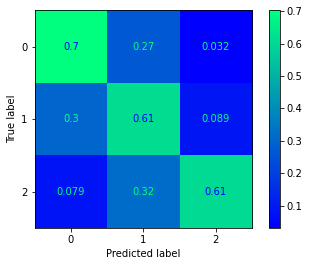

              precision    recall  f1-score   support

        -1.0       0.74      0.70      0.72       158
         0.0       0.58      0.61      0.60       124
         1.0       0.59      0.61      0.60        38
		 R2 Score: 0.11258278145695366



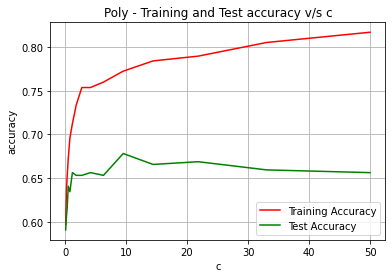

In [906]:
num_of_different_c = 16
c_svm_linear = np.geomspace(0.06, 0.4, num=num_of_different_c)
c_svm_rbf = np.geomspace(1, 23, num=num_of_different_c)
c_svm_poly = np.geomspace(0.1, 50, num=num_of_different_c)

train_and_plot(X_train, y_train, X_test, y_test, c_svm_linear, c_svm_rbf, c_svm_poly)

# Train White Wines Data

In [907]:
X_train, y_train, X_test, y_test = transform_and_split_data(data_red)

Original y hist: (array([  0,   0,   0,  10,  53, 681, 638, 217]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]))
Current y hist: (array([638, 217,   0]), array([-0.5,  0.5,  1.5,  2.5]))
y min: -1.0, y max: 1.0
The shape of the wines dataset: (1599, 12)
y[:10]:
[-1.  1.  0. -1. -1. -1. -1.  0.  0.  0.]
X[:10, :]:
[[8.1000e+00 7.8500e-01 5.2000e-01 2.0000e+00 1.2200e-01 3.7000e+01
  1.5300e+02 9.9690e-01 3.2100e+00 6.9000e-01 9.3000e+00]
 [7.2000e+00 3.8000e-01 3.1000e-01 2.0000e+00 5.6000e-02 1.5000e+01
  2.9000e+01 9.9472e-01 3.2300e+00 7.6000e-01 1.1300e+01]
 [9.6000e+00 4.2000e-01 3.5000e-01 2.1000e+00 8.3000e-02 1.7000e+01
  3.8000e+01 9.9622e-01 3.2300e+00 6.6000e-01 1.1100e+01]
 [6.3000e+00 3.9000e-01 8.0000e-02 1.7000e+00 6.6000e-02 3.0000e+00
  2.0000e+01 9.9540e-01 3.3400e+00 5.8000e-01 9.4000e+00]
 [8.4000e+00 6.6500e-01 6.1000e-01 2.0000e+00 1.1200e-01 1.3000e+01
  9.5000e+01 9.9700e-01 3.1600e+00 5.4000e-01 9.1000e+00]
 [1.2200e+01 4.5000e-01 4.9000e-01 1.4000e+00 7.5000e-02 3.0000e+

SVM - Linear, Train Accuracy = 0.6270523846755277, C=0.06
Test Accuracy = 0.596875


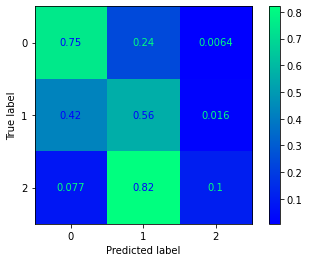

              precision    recall  f1-score   support

        -1.0       0.68      0.75      0.71       156
         0.0       0.50      0.56      0.53       125
         1.0       0.57      0.10      0.17        39
		 R2 Score: 0.07372051487343723

SVM - Linear, Train Accuracy = 0.6356528537920251, C=0.07130946302904165
Test Accuracy = 0.603125


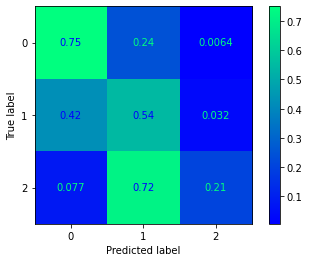

              precision    recall  f1-score   support

        -1.0       0.68      0.75      0.71       156
         0.0       0.51      0.54      0.53       125
         1.0       0.62      0.21      0.31        39
		 R2 Score: 0.0868592309745233

SVM - Linear, Train Accuracy = 0.63721657544957, C=0.08475065862483763
Test Accuracy = 0.603125


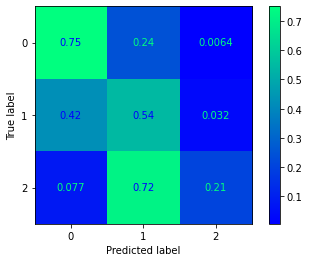

              precision    recall  f1-score   support

        -1.0       0.68      0.75      0.71       156
         0.0       0.51      0.54      0.53       125
         1.0       0.62      0.21      0.31        39
		 R2 Score: 0.0868592309745233

SVM - Linear, Train Accuracy = 0.6403440187646599, C=0.10072539929824649
Test Accuracy = 0.609375


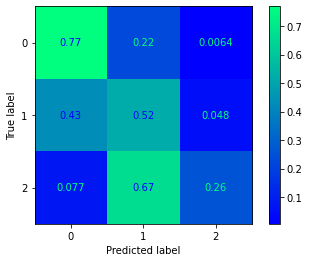

              precision    recall  f1-score   support

        -1.0       0.68      0.77      0.72       156
         0.0       0.52      0.52      0.52       125
         1.0       0.59      0.26      0.36        39
		 R2 Score: 0.09999794707560927

SVM - Linear, Train Accuracy = 0.6403440187646599, C=0.1197112356223961
Test Accuracy = 0.60625


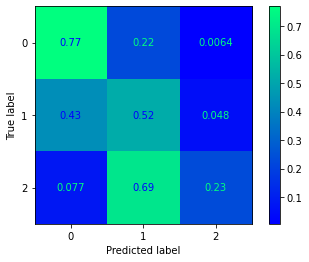

              precision    recall  f1-score   support

        -1.0       0.68      0.77      0.72       156
         0.0       0.51      0.52      0.52       125
         1.0       0.56      0.23      0.33        39
		 R2 Score: 0.09342858902506623

SVM - Linear, Train Accuracy = 0.6403440187646599, C=0.1422757321796025
Test Accuracy = 0.609375


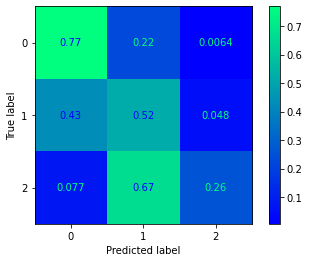

              precision    recall  f1-score   support

        -1.0       0.68      0.77      0.72       156
         0.0       0.52      0.52      0.52       125
         1.0       0.59      0.26      0.36        39
		 R2 Score: 0.09999794707560927

SVM - Linear, Train Accuracy = 0.6426896012509773, C=0.16909343439651997
Test Accuracy = 0.609375


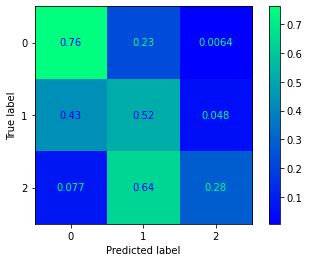

              precision    recall  f1-score   support

        -1.0       0.68      0.76      0.72       156
         0.0       0.52      0.52      0.52       125
         1.0       0.61      0.28      0.39        39
		 R2 Score: 0.09999794707560927

SVM - Linear, Train Accuracy = 0.6426896012509773, C=0.200966033475872
Test Accuracy = 0.603125


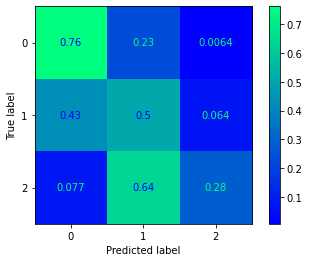

              precision    recall  f1-score   support

        -1.0       0.68      0.76      0.72       156
         0.0       0.51      0.50      0.51       125
         1.0       0.55      0.28      0.37        39
		 R2 Score: 0.0868592309745233

SVM - Linear, Train Accuracy = 0.6442533229085223, C=0.23884633223734736
Test Accuracy = 0.596875


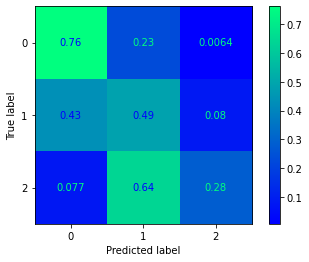

              precision    recall  f1-score   support

        -1.0       0.68      0.76      0.72       156
         0.0       0.50      0.49      0.49       125
         1.0       0.50      0.28      0.36        39
		 R2 Score: 0.07372051487343723

SVM - Linear, Train Accuracy = 0.6473807662236122, C=0.283866728305022
Test Accuracy = 0.59375


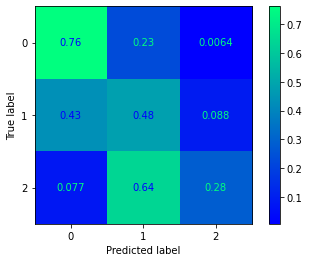

              precision    recall  f1-score   support

        -1.0       0.68      0.76      0.72       156
         0.0       0.50      0.48      0.49       125
         1.0       0.48      0.28      0.35        39
		 R2 Score: 0.0671511568228943

SVM - Linear, Train Accuracy = 0.6465989053948398, C=0.33737306612069967
Test Accuracy = 0.59375


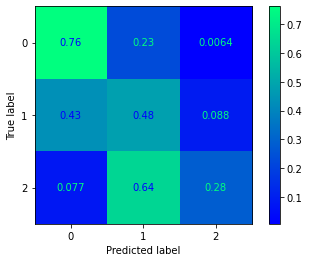

              precision    recall  f1-score   support

        -1.0       0.68      0.76      0.72       156
         0.0       0.50      0.48      0.49       125
         1.0       0.48      0.28      0.35        39
		 R2 Score: 0.0671511568228943

SVM - Linear, Train Accuracy = 0.6497263487099296, C=0.4009648697588076
Test Accuracy = 0.5875


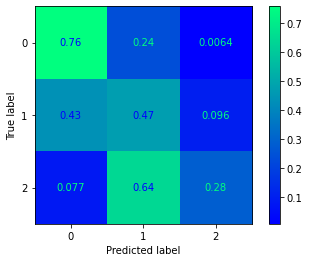

              precision    recall  f1-score   support

        -1.0       0.67      0.76      0.71       156
         0.0       0.49      0.47      0.48       125
         1.0       0.46      0.28      0.35        39
		 R2 Score: 0.05401244072180833

SVM - Linear, Train Accuracy = 0.6505082095387021, C=0.47654315926683666
Test Accuracy = 0.5875


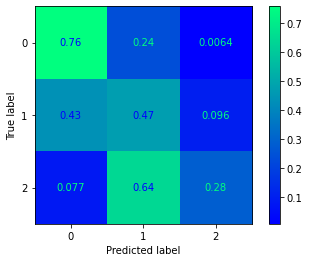

              precision    recall  f1-score   support

        -1.0       0.67      0.76      0.71       156
         0.0       0.49      0.47      0.48       125
         1.0       0.46      0.28      0.35        39
		 R2 Score: 0.05401244072180833

SVM - Linear, Train Accuracy = 0.6465989053948398, C=0.5663672799580199
Test Accuracy = 0.590625


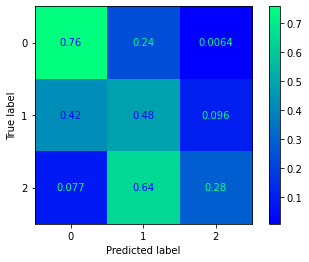

              precision    recall  f1-score   support

        -1.0       0.68      0.76      0.72       156
         0.0       0.49      0.48      0.49       125
         1.0       0.46      0.28      0.35        39
		 R2 Score: 0.06058179877235126

SVM - Linear, Train Accuracy = 0.6473807662236122, C=0.6731224435170884
Test Accuracy = 0.5875


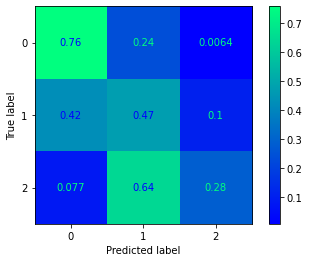

              precision    recall  f1-score   support

        -1.0       0.68      0.76      0.72       156
         0.0       0.49      0.47      0.48       125
         1.0       0.44      0.28      0.34        39
		 R2 Score: 0.05401244072180833

SVM - Linear, Train Accuracy = 0.6473807662236122, C=0.8
Test Accuracy = 0.5875


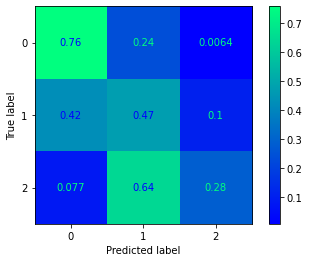

              precision    recall  f1-score   support

        -1.0       0.68      0.76      0.72       156
         0.0       0.49      0.47      0.48       125
         1.0       0.44      0.28      0.34        39
		 R2 Score: 0.05401244072180833



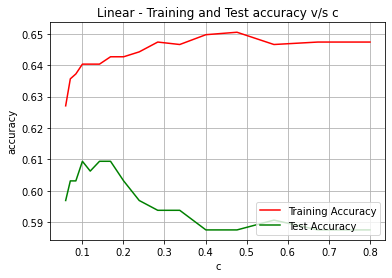

SVM - RBF, Train Accuracy = 0.7052384675527756, C=1.0
Test Accuracy = 0.6375


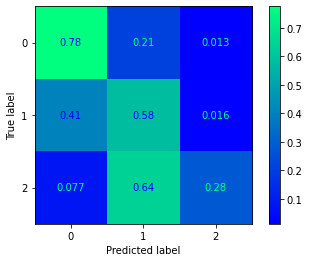

              precision    recall  f1-score   support

        -1.0       0.69      0.78      0.73       156
         0.0       0.55      0.58      0.56       125
         1.0       0.73      0.28      0.41        39
		 R2 Score: 0.1394140953788673

SVM - RBF, Train Accuracy = 0.7122752150117279, C=1.2324856054625426
Test Accuracy = 0.65


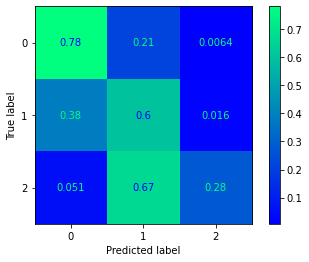

              precision    recall  f1-score   support

        -1.0       0.71      0.78      0.74       156
         0.0       0.56      0.60      0.58       125
         1.0       0.79      0.28      0.42        39
		 R2 Score: 0.20510767588429724

SVM - RBF, Train Accuracy = 0.7200938232994527, C=1.5190207676723702
Test Accuracy = 0.640625


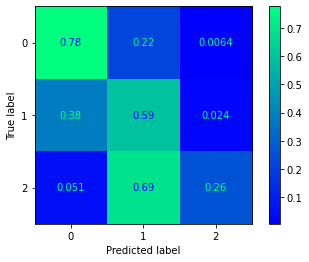

              precision    recall  f1-score   support

        -1.0       0.71      0.78      0.74       156
         0.0       0.55      0.59      0.57       125
         1.0       0.71      0.26      0.38        39
		 R2 Score: 0.18539960173266823

SVM - RBF, Train Accuracy = 0.7216575449569976, C=1.8721712305548572
Test Accuracy = 0.64375


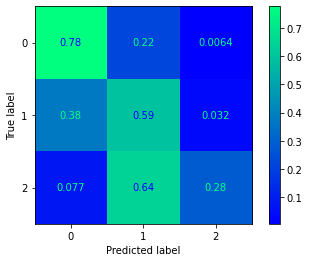

              precision    recall  f1-score   support

        -1.0       0.71      0.78      0.74       156
         0.0       0.56      0.59      0.57       125
         1.0       0.69      0.28      0.40        39
		 R2 Score: 0.17226088563158226

SVM - RBF, Train Accuracy = 0.743549648162627, C=2.3074240926199567
Test Accuracy = 0.640625


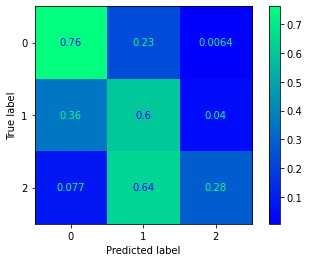

              precision    recall  f1-score   support

        -1.0       0.71      0.76      0.74       156
         0.0       0.55      0.60      0.57       125
         1.0       0.65      0.28      0.39        39
		 R2 Score: 0.16569152758103922

SVM - RBF, Train Accuracy = 0.7505863956215794, C=2.8438669798515654
Test Accuracy = 0.64375


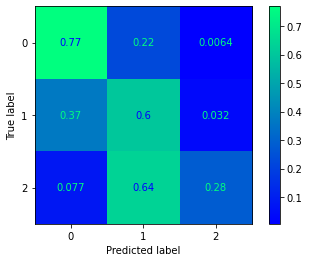

              precision    recall  f1-score   support

        -1.0       0.71      0.77      0.74       156
         0.0       0.56      0.60      0.58       125
         1.0       0.69      0.28      0.40        39
		 R2 Score: 0.17226088563158226

SVM - RBF, Train Accuracy = 0.763096168881939, C=3.5050251165172885
Test Accuracy = 0.65


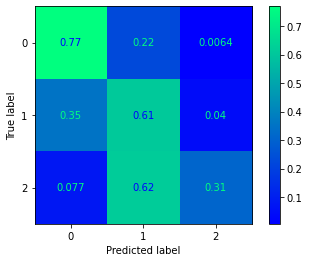

              precision    recall  f1-score   support

        -1.0       0.72      0.77      0.74       156
         0.0       0.56      0.61      0.58       125
         1.0       0.67      0.31      0.42        39
		 R2 Score: 0.18539960173266823

SVM - RBF, Train Accuracy = 0.7677873338545739, C=4.31989300289223
Test Accuracy = 0.65


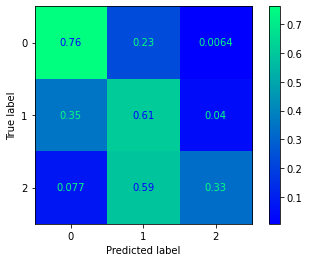

              precision    recall  f1-score   support

        -1.0       0.72      0.76      0.74       156
         0.0       0.56      0.61      0.58       125
         1.0       0.68      0.33      0.45        39
		 R2 Score: 0.18539960173266823

SVM - RBF, Train Accuracy = 0.7771696637998436, C=5.32420594320303
Test Accuracy = 0.65


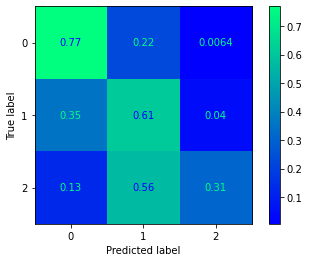

              precision    recall  f1-score   support

        -1.0       0.71      0.77      0.74       156
         0.0       0.57      0.61      0.59       125
         1.0       0.67      0.31      0.42        39
		 R2 Score: 0.14598345342941021

SVM - RBF, Train Accuracy = 0.7849882720875684, C=6.562007185515855
Test Accuracy = 0.659375


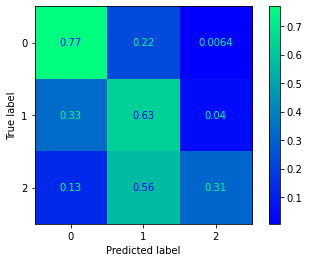

              precision    recall  f1-score   support

        -1.0       0.72      0.77      0.75       156
         0.0       0.58      0.63      0.61       125
         1.0       0.67      0.31      0.42        39
		 R2 Score: 0.16569152758103922

SVM - RBF, Train Accuracy = 0.7951524628616107, C=8.087579399090064
Test Accuracy = 0.675


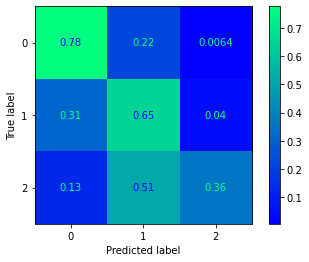

              precision    recall  f1-score   support

        -1.0       0.73      0.78      0.75       156
         0.0       0.60      0.65      0.62       125
         1.0       0.70      0.36      0.47        39
		 R2 Score: 0.1985383178337542

SVM - RBF, Train Accuracy = 0.7998436278342455, C=9.967825192413903
Test Accuracy = 0.671875


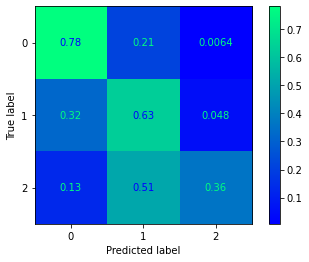

              precision    recall  f1-score   support

        -1.0       0.73      0.78      0.76       156
         0.0       0.60      0.63      0.61       125
         1.0       0.67      0.36      0.47        39
		 R2 Score: 0.19196895978321127

SVM - RBF, Train Accuracy = 0.8107896794370602, C=12.285201067417033
Test Accuracy = 0.675


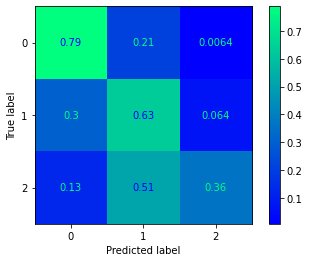

              precision    recall  f1-score   support

        -1.0       0.74      0.79      0.76       156
         0.0       0.60      0.63      0.62       125
         1.0       0.61      0.36      0.45        39
		 R2 Score: 0.1985383178337542

SVM - RBF, Train Accuracy = 0.8248631743549648, C=15.141333475804554
Test Accuracy = 0.66875


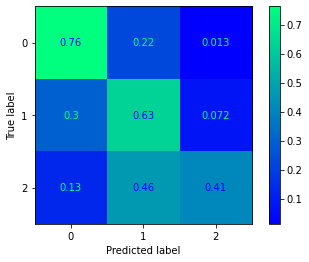

              precision    recall  f1-score   support

        -1.0       0.74      0.76      0.75       156
         0.0       0.60      0.63      0.61       125
         1.0       0.59      0.41      0.48        39
		 R2 Score: 0.16569152758103922

SVM - RBF, Train Accuracy = 0.835027365129007, C=18.66147555643725
Test Accuracy = 0.678125


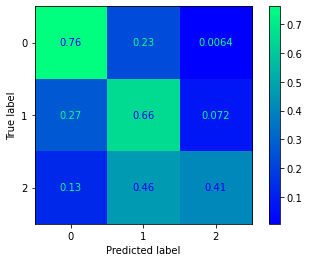

              precision    recall  f1-score   support

        -1.0       0.75      0.76      0.76       156
         0.0       0.60      0.66      0.63       125
         1.0       0.62      0.41      0.49        39
		 R2 Score: 0.20510767588429724

SVM - RBF, Train Accuracy = 0.8451915559030493, C=23.0
Test Accuracy = 0.675


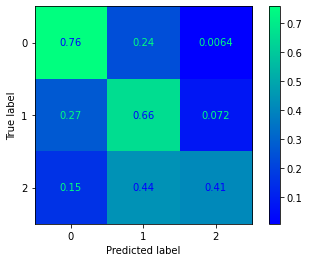

              precision    recall  f1-score   support

        -1.0       0.75      0.76      0.75       156
         0.0       0.60      0.66      0.63       125
         1.0       0.62      0.41      0.49        39
		 R2 Score: 0.1788302436821253



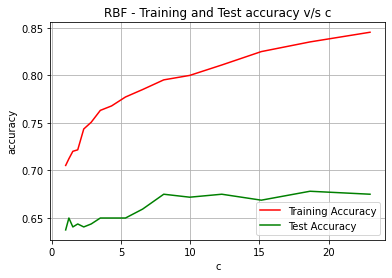

SVM - Poly, Train Accuracy = 0.5934323690383112, C=0.1
Test Accuracy = 0.5875


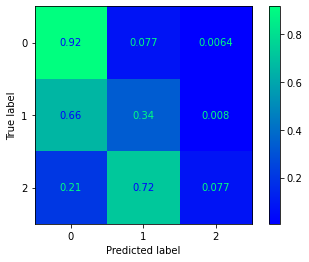

              precision    recall  f1-score   support

        -1.0       0.61      0.92      0.74       156
         0.0       0.51      0.34      0.41       125
         1.0       0.60      0.08      0.14        39
		 R2 Score: -0.044527930036336594

SVM - Poly, Train Accuracy = 0.6106333072713057, C=0.151332195791627
Test Accuracy = 0.6


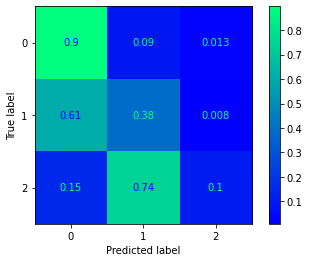

              precision    recall  f1-score   support

        -1.0       0.63      0.90      0.74       156
         0.0       0.53      0.38      0.44       125
         1.0       0.57      0.10      0.17        39
		 R2 Score: 0.0014575763174643486

SVM - Poly, Train Accuracy = 0.6348709929632526, C=0.22901433483115327
Test Accuracy = 0.6


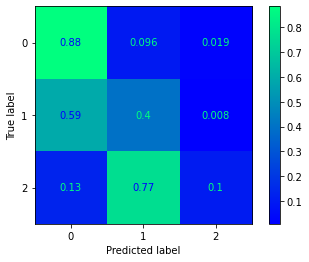

              precision    recall  f1-score   support

        -1.0       0.64      0.88      0.74       156
         0.0       0.53      0.40      0.45       125
         1.0       0.50      0.10      0.17        39
		 R2 Score: 0.0014575763174643486

SVM - Poly, Train Accuracy = 0.653635652853792, C=0.3465724215775732
Test Accuracy = 0.609375


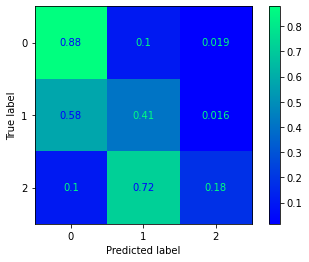

              precision    recall  f1-score   support

        -1.0       0.64      0.88      0.74       156
         0.0       0.54      0.41      0.46       125
         1.0       0.58      0.18      0.27        39
		 R2 Score: 0.04087372462072225

SVM - Poly, Train Accuracy = 0.6810007818608288, C=0.524475655581556
Test Accuracy = 0.61875


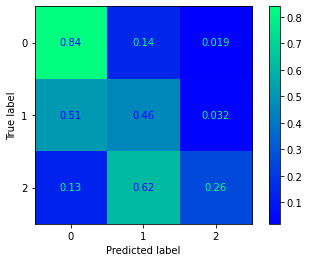

              precision    recall  f1-score   support

        -1.0       0.66      0.84      0.74       156
         0.0       0.55      0.46      0.50       125
         1.0       0.59      0.26      0.36        39
		 R2 Score: 0.04087372462072225

SVM - Poly, Train Accuracy = 0.6958561376075059, C=0.7937005259840996
Test Accuracy = 0.628125


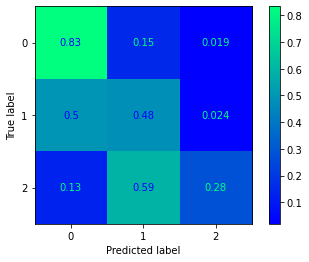

              precision    recall  f1-score   support

        -1.0       0.66      0.83      0.74       156
         0.0       0.57      0.48      0.52       125
         1.0       0.65      0.28      0.39        39
		 R2 Score: 0.06058179877235126

SVM - Poly, Train Accuracy = 0.7154026583268178, C=1.201124433981431
Test Accuracy = 0.6375


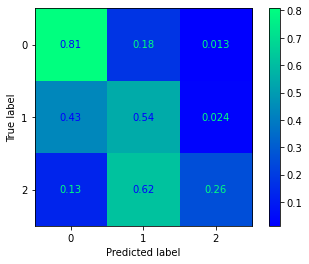

              precision    recall  f1-score   support

        -1.0       0.68      0.81      0.74       156
         0.0       0.57      0.54      0.56       125
         1.0       0.67      0.26      0.37        39
		 R2 Score: 0.09999794707560927

SVM - Poly, Train Accuracy = 0.7240031274433151, C=1.8176879801338506
Test Accuracy = 0.640625


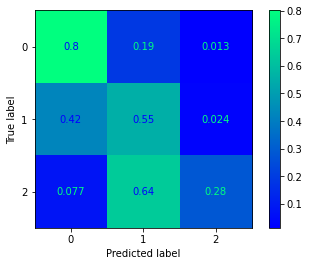

              precision    recall  f1-score   support

        -1.0       0.69      0.80      0.74       156
         0.0       0.56      0.55      0.56       125
         1.0       0.69      0.28      0.40        39
		 R2 Score: 0.14598345342941021

SVM - Poly, Train Accuracy = 0.7412040656763096, C=2.7507471329770294
Test Accuracy = 0.615625


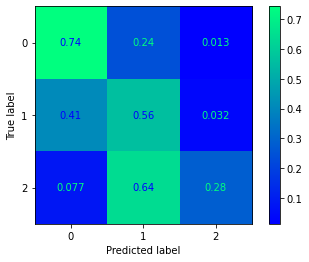

              precision    recall  f1-score   support

        -1.0       0.68      0.74      0.71       156
         0.0       0.53      0.56      0.54       125
         1.0       0.65      0.28      0.39        39
		 R2 Score: 0.09342858902506623

SVM - Poly, Train Accuracy = 0.7490226739640344, C=4.162766037009366
Test Accuracy = 0.61875


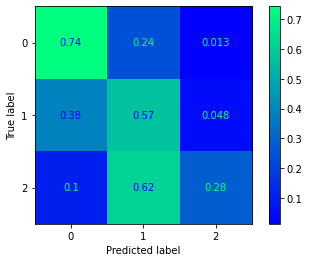

              precision    recall  f1-score   support

        -1.0       0.69      0.74      0.72       156
         0.0       0.53      0.57      0.55       125
         1.0       0.58      0.28      0.38        39
		 R2 Score: 0.08028987292398027

SVM - Poly, Train Accuracy = 0.7607505863956215, C=6.2996052494743635
Test Accuracy = 0.621875


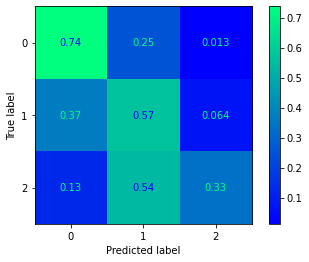

              precision    recall  f1-score   support

        -1.0       0.69      0.74      0.71       156
         0.0       0.54      0.57      0.55       125
         1.0       0.57      0.33      0.42        39
		 R2 Score: 0.0671511568228943

SVM - Poly, Train Accuracy = 0.7756059421422987, C=9.533330950234157
Test Accuracy = 0.621875


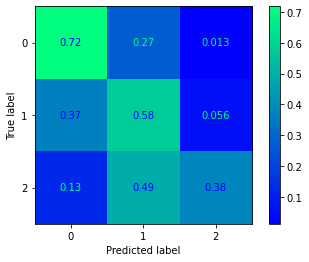

              precision    recall  f1-score   support

        -1.0       0.69      0.72      0.70       156
         0.0       0.54      0.58      0.56       125
         1.0       0.62      0.38      0.48        39
		 R2 Score: 0.0671511568228943

SVM - Poly, Train Accuracy = 0.781078967943706, C=14.426999059072134
Test Accuracy = 0.615625


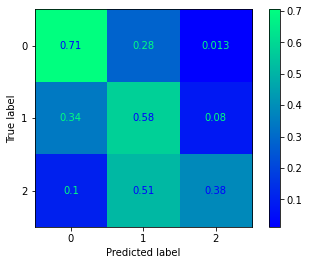

              precision    recall  f1-score   support

        -1.0       0.70      0.71      0.70       156
         0.0       0.53      0.58      0.55       125
         1.0       0.56      0.38      0.45        39
		 R2 Score: 0.07372051487343723

SVM - Poly, Train Accuracy = 0.7896794370602033, C=21.832694462931222
Test Accuracy = 0.621875


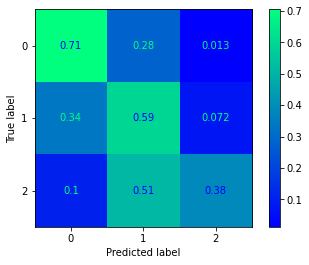

              precision    recall  f1-score   support

        -1.0       0.71      0.71      0.71       156
         0.0       0.54      0.59      0.56       125
         1.0       0.58      0.38      0.46        39
		 R2 Score: 0.0868592309745233

SVM - Poly, Train Accuracy = 0.799061767005473, C=33.039895931230774
Test Accuracy = 0.634375


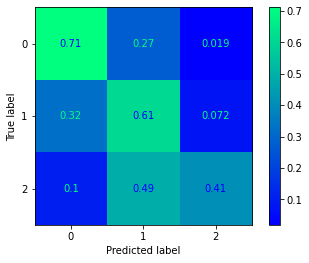

              precision    recall  f1-score   support

        -1.0       0.72      0.71      0.71       156
         0.0       0.55      0.61      0.58       125
         1.0       0.57      0.41      0.48        39
		 R2 Score: 0.09342858902506623

SVM - Poly, Train Accuracy = 0.8076622361219703, C=50.0
Test Accuracy = 0.628125


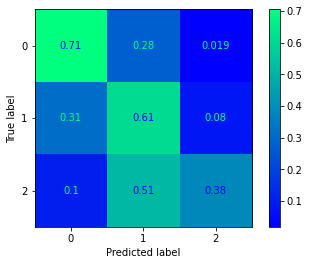

              precision    recall  f1-score   support

        -1.0       0.72      0.71      0.71       156
         0.0       0.55      0.61      0.58       125
         1.0       0.54      0.38      0.45        39
		 R2 Score: 0.08028987292398027



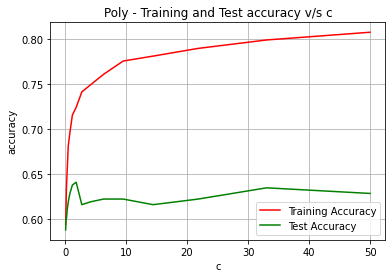

In [908]:
c_svm_linear = np.geomspace(0.06, 0.8, num=num_of_different_c)
c_svm_rbf = np.geomspace(1, 23, num=num_of_different_c)
c_svm_poly = np.geomspace(0.1, 50, num=num_of_different_c)

train_and_plot(X_train, y_train, X_test, y_test, c_svm_linear, c_svm_rbf, c_svm_poly)

# Train All Wines Data

In [909]:
X_train, y_train, X_test, y_test = transform_and_split_data(data_red)

Original y hist: (array([  0,   0,   0,  10,  53, 681, 638, 217]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]))
Current y hist: (array([638, 217,   0]), array([-0.5,  0.5,  1.5,  2.5]))
y min: -1.0, y max: 1.0
The shape of the wines dataset: (1599, 12)
y[:10]:
[-1.  1.  0. -1. -1. -1. -1.  0.  0.  0.]
X[:10, :]:
[[8.1000e+00 7.8500e-01 5.2000e-01 2.0000e+00 1.2200e-01 3.7000e+01
  1.5300e+02 9.9690e-01 3.2100e+00 6.9000e-01 9.3000e+00]
 [7.2000e+00 3.8000e-01 3.1000e-01 2.0000e+00 5.6000e-02 1.5000e+01
  2.9000e+01 9.9472e-01 3.2300e+00 7.6000e-01 1.1300e+01]
 [9.6000e+00 4.2000e-01 3.5000e-01 2.1000e+00 8.3000e-02 1.7000e+01
  3.8000e+01 9.9622e-01 3.2300e+00 6.6000e-01 1.1100e+01]
 [6.3000e+00 3.9000e-01 8.0000e-02 1.7000e+00 6.6000e-02 3.0000e+00
  2.0000e+01 9.9540e-01 3.3400e+00 5.8000e-01 9.4000e+00]
 [8.4000e+00 6.6500e-01 6.1000e-01 2.0000e+00 1.1200e-01 1.3000e+01
  9.5000e+01 9.9700e-01 3.1600e+00 5.4000e-01 9.1000e+00]
 [1.2200e+01 4.5000e-01 4.9000e-01 1.4000e+00 7.5000e-02 3.0000e+

SVM - Linear, Train Accuracy = 0.616106333072713, C=0.06
Test Accuracy = 0.590625


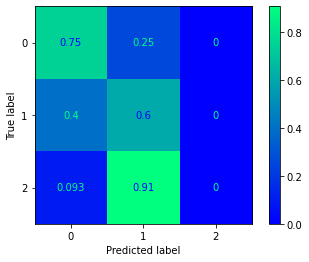

              precision    recall  f1-score   support

        -1.0       0.68      0.75      0.71       153
         0.0       0.49      0.60      0.54       124
         1.0       0.00      0.00      0.00        43
		 R2 Score: 0.09600948241801655

SVM - Linear, Train Accuracy = 0.6200156372165755, C=0.0680892420526407
Test Accuracy = 0.584375


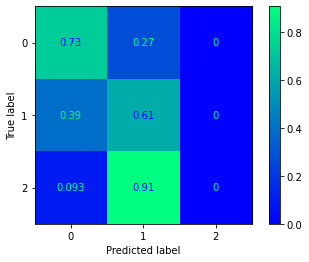

              precision    recall  f1-score   support

        -1.0       0.68      0.73      0.70       153
         0.0       0.48      0.61      0.54       124
         1.0       0.00      0.00      0.00        43
		 R2 Score: 0.08336625839589096

SVM - Linear, Train Accuracy = 0.619233776387803, C=0.07726908138838487
Test Accuracy = 0.590625


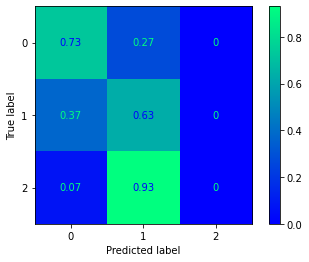

              precision    recall  f1-score   support

        -1.0       0.69      0.73      0.71       153
         0.0       0.49      0.63      0.55       124
         1.0       0.00      0.00      0.00        43
		 R2 Score: 0.1149743184512051

SVM - Linear, Train Accuracy = 0.6215793588741204, C=0.08768655309731553
Test Accuracy = 0.5875


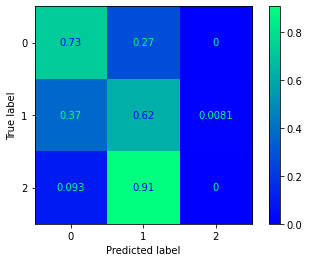

              precision    recall  f1-score   support

        -1.0       0.69      0.73      0.71       153
         0.0       0.49      0.62      0.55       124
         1.0       0.00      0.00      0.00        43
		 R2 Score: 0.0896878704069538

SVM - Linear, Train Accuracy = 0.6247068021892104, C=0.09950851564341409
Test Accuracy = 0.59375


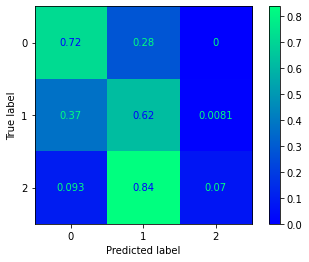

              precision    recall  f1-score   support

        -1.0       0.69      0.72      0.70       153
         0.0       0.49      0.62      0.55       124
         1.0       0.75      0.07      0.13        43
		 R2 Score: 0.1023310944290794

SVM - Linear, Train Accuracy = 0.6293979671618452, C=0.11292432346572343
Test Accuracy = 0.6


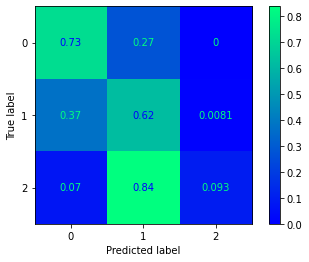

              precision    recall  f1-score   support

        -1.0       0.69      0.73      0.71       153
         0.0       0.50      0.62      0.55       124
         1.0       0.80      0.09      0.17        43
		 R2 Score: 0.13393915448439353

SVM - Linear, Train Accuracy = 0.6317435496481626, C=0.12814885990147223
Test Accuracy = 0.60625


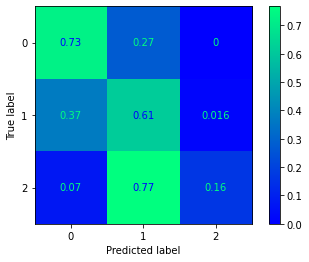

              precision    recall  f1-score   support

        -1.0       0.69      0.73      0.71       153
         0.0       0.50      0.61      0.55       124
         1.0       0.78      0.16      0.27        43
		 R2 Score: 0.14658237850651912

SVM - Linear, Train Accuracy = 0.6395621579358874, C=0.14542597901002138
Test Accuracy = 0.6125


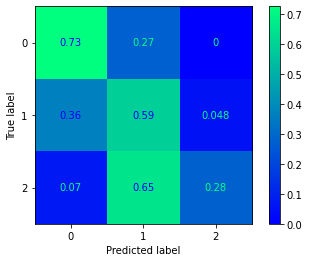

              precision    recall  f1-score   support

        -1.0       0.70      0.73      0.71       153
         0.0       0.51      0.59      0.55       124
         1.0       0.67      0.28      0.39        43
		 R2 Score: 0.15922560252864482

SVM - Linear, Train Accuracy = 0.6395621579358874, C=0.1650324114259265
Test Accuracy = 0.609375


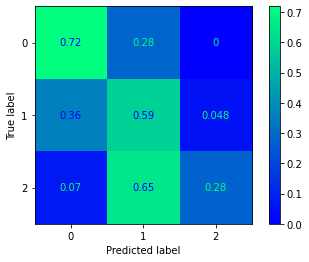

              precision    recall  f1-score   support

        -1.0       0.70      0.72      0.71       153
         0.0       0.51      0.59      0.54       124
         1.0       0.67      0.28      0.39        43
		 R2 Score: 0.15290399051758197

SVM - Linear, Train Accuracy = 0.6395621579358874, C=0.1872821968018482
Test Accuracy = 0.609375


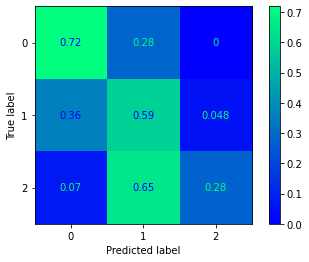

              precision    recall  f1-score   support

        -1.0       0.70      0.72      0.71       153
         0.0       0.51      0.59      0.54       124
         1.0       0.67      0.28      0.39        43
		 R2 Score: 0.15290399051758197

SVM - Linear, Train Accuracy = 0.6395621579358874, C=0.2125317138365222
Test Accuracy = 0.60625


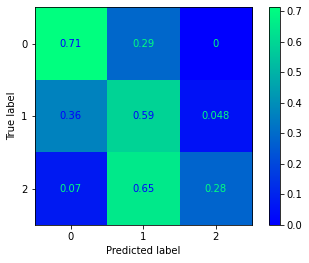

              precision    recall  f1-score   support

        -1.0       0.69      0.71      0.70       153
         0.0       0.50      0.59      0.54       124
         1.0       0.67      0.28      0.39        43
		 R2 Score: 0.14658237850651912

SVM - Linear, Train Accuracy = 0.6395621579358874, C=0.2411853884546254
Test Accuracy = 0.60625


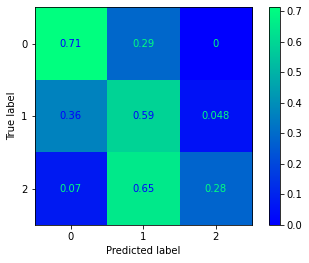

              precision    recall  f1-score   support

        -1.0       0.69      0.71      0.70       153
         0.0       0.50      0.59      0.54       124
         1.0       0.67      0.28      0.39        43
		 R2 Score: 0.14658237850651912

SVM - Linear, Train Accuracy = 0.6395621579358874, C=0.2737021715674527
Test Accuracy = 0.60625


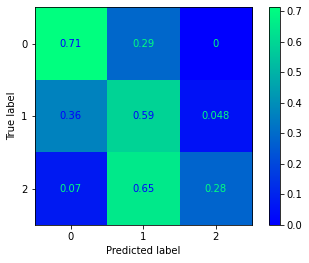

              precision    recall  f1-score   support

        -1.0       0.69      0.71      0.70       153
         0.0       0.50      0.59      0.54       124
         1.0       0.67      0.28      0.39        43
		 R2 Score: 0.14658237850651912

SVM - Linear, Train Accuracy = 0.6442533229085223, C=0.3106028901698279
Test Accuracy = 0.603125


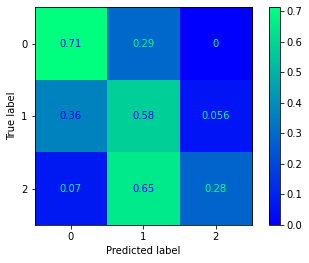

              precision    recall  f1-score   support

        -1.0       0.69      0.71      0.70       153
         0.0       0.50      0.58      0.54       124
         1.0       0.63      0.28      0.39        43
		 R2 Score: 0.14026076649545638

SVM - Linear, Train Accuracy = 0.6442533229085223, C=0.352478589517053
Test Accuracy = 0.603125


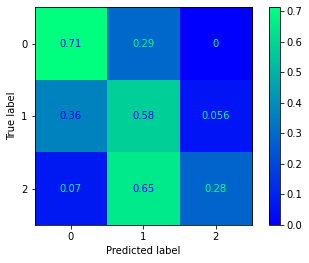

              precision    recall  f1-score   support

        -1.0       0.69      0.71      0.70       153
         0.0       0.50      0.58      0.54       124
         1.0       0.63      0.28      0.39        43
		 R2 Score: 0.14026076649545638

SVM - Linear, Train Accuracy = 0.6442533229085223, C=0.4
Test Accuracy = 0.603125


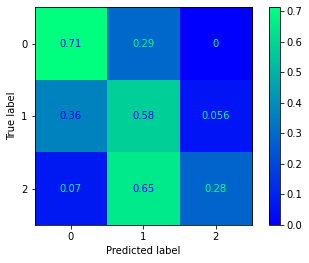

              precision    recall  f1-score   support

        -1.0       0.69      0.71      0.70       153
         0.0       0.50      0.58      0.54       124
         1.0       0.63      0.28      0.39        43
		 R2 Score: 0.14026076649545638



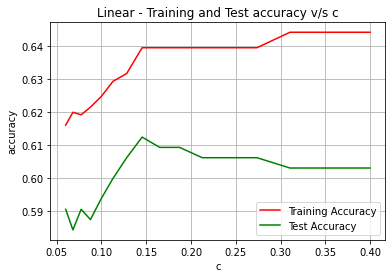

SVM - RBF, Train Accuracy = 0.7028928850664582, C=1.0
Test Accuracy = 0.64375


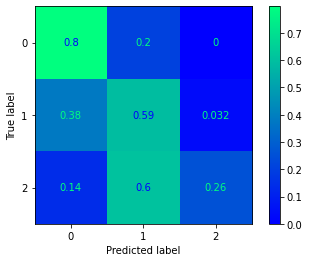

              precision    recall  f1-score   support

        -1.0       0.70      0.80      0.74       153
         0.0       0.56      0.59      0.57       124
         1.0       0.73      0.26      0.38        43
		 R2 Score: 0.16554721453970767

SVM - RBF, Train Accuracy = 0.7099296325254105, C=1.2324856054625426
Test Accuracy = 0.65


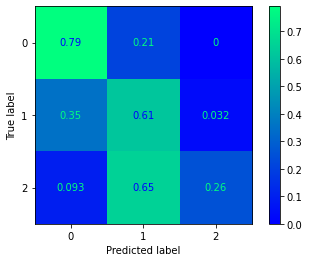

              precision    recall  f1-score   support

        -1.0       0.72      0.79      0.75       153
         0.0       0.56      0.61      0.58       124
         1.0       0.73      0.26      0.38        43
		 R2 Score: 0.21612011062821024

SVM - RBF, Train Accuracy = 0.7193119624706802, C=1.5190207676723702
Test Accuracy = 0.65625


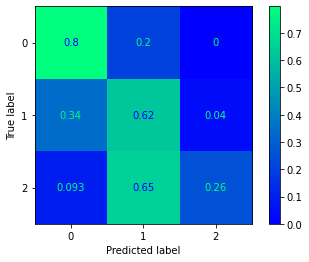

              precision    recall  f1-score   support

        -1.0       0.73      0.80      0.76       153
         0.0       0.57      0.62      0.59       124
         1.0       0.69      0.26      0.37        43
		 R2 Score: 0.22876333465033583

SVM - RBF, Train Accuracy = 0.7294761532447225, C=1.8721712305548572
Test Accuracy = 0.65625


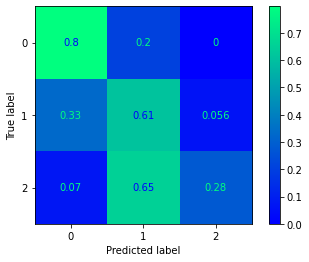

              precision    recall  f1-score   support

        -1.0       0.73      0.80      0.76       153
         0.0       0.56      0.61      0.59       124
         1.0       0.63      0.28      0.39        43
		 R2 Score: 0.24772817068352426

SVM - RBF, Train Accuracy = 0.7388584831899921, C=2.3074240926199567
Test Accuracy = 0.653125


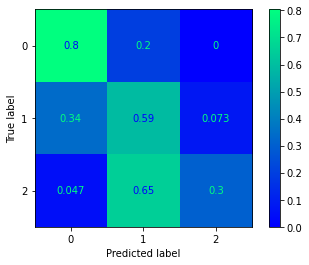

              precision    recall  f1-score   support

        -1.0       0.74      0.80      0.77       153
         0.0       0.56      0.59      0.57       124
         1.0       0.59      0.30      0.40        43
		 R2 Score: 0.26037139470564996

SVM - RBF, Train Accuracy = 0.7599687255668491, C=2.8438669798515654
Test Accuracy = 0.659375


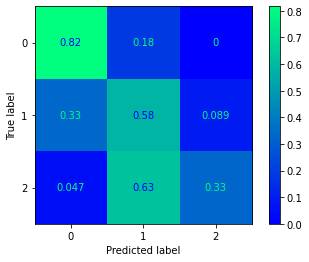

              precision    recall  f1-score   support

        -1.0       0.74      0.82      0.78       153
         0.0       0.57      0.58      0.57       124
         1.0       0.56      0.33      0.41        43
		 R2 Score: 0.27301461872777555

SVM - RBF, Train Accuracy = 0.7638780297107115, C=3.5050251165172885
Test Accuracy = 0.665625


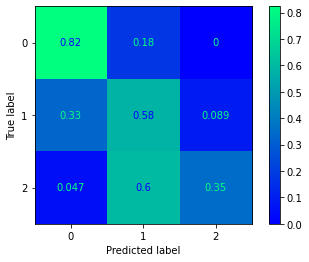

              precision    recall  f1-score   support

        -1.0       0.75      0.82      0.78       153
         0.0       0.58      0.58      0.58       124
         1.0       0.58      0.35      0.43        43
		 R2 Score: 0.28565784274990125

SVM - RBF, Train Accuracy = 0.7685691946833464, C=4.31989300289223
Test Accuracy = 0.665625


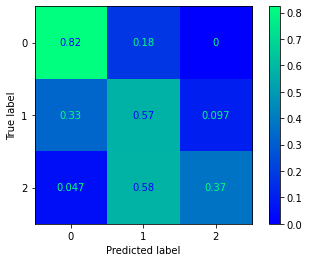

              precision    recall  f1-score   support

        -1.0       0.75      0.82      0.78       153
         0.0       0.58      0.57      0.57       124
         1.0       0.57      0.37      0.45        43
		 R2 Score: 0.28565784274990125

SVM - RBF, Train Accuracy = 0.7818608287724785, C=5.32420594320303
Test Accuracy = 0.66875


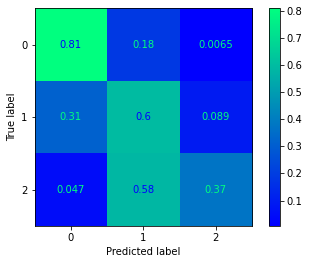

              precision    recall  f1-score   support

        -1.0       0.75      0.81      0.78       153
         0.0       0.58      0.60      0.59       124
         1.0       0.57      0.37      0.45        43
		 R2 Score: 0.27301461872777555

SVM - RBF, Train Accuracy = 0.7928068803752932, C=6.562007185515855
Test Accuracy = 0.675


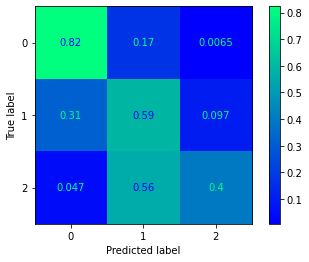

              precision    recall  f1-score   support

        -1.0       0.75      0.82      0.79       153
         0.0       0.59      0.59      0.59       124
         1.0       0.57      0.40      0.47        43
		 R2 Score: 0.28565784274990125

SVM - RBF, Train Accuracy = 0.8014073494917905, C=8.087579399090064
Test Accuracy = 0.678125


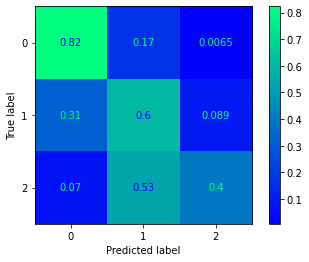

              precision    recall  f1-score   support

        -1.0       0.75      0.82      0.79       153
         0.0       0.60      0.60      0.60       124
         1.0       0.59      0.40      0.47        43
		 R2 Score: 0.27301461872777555

SVM - RBF, Train Accuracy = 0.8092259577795152, C=9.967825192413903
Test Accuracy = 0.684375


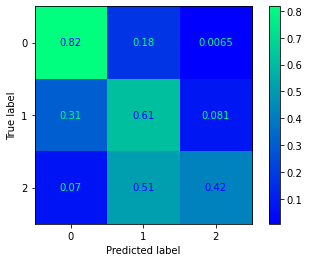

              precision    recall  f1-score   support

        -1.0       0.75      0.82      0.78       153
         0.0       0.61      0.61      0.61       124
         1.0       0.62      0.42      0.50        43
		 R2 Score: 0.28565784274990125

SVM - RBF, Train Accuracy = 0.8146989835809226, C=12.285201067417033
Test Accuracy = 0.665625


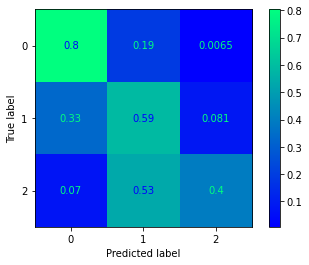

              precision    recall  f1-score   support

        -1.0       0.74      0.80      0.77       153
         0.0       0.58      0.59      0.59       124
         1.0       0.61      0.40      0.48        43
		 R2 Score: 0.24772817068352426

SVM - RBF, Train Accuracy = 0.8240813135261923, C=15.141333475804554
Test Accuracy = 0.6625


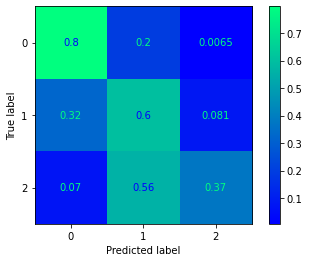

              precision    recall  f1-score   support

        -1.0       0.74      0.80      0.77       153
         0.0       0.58      0.60      0.59       124
         1.0       0.59      0.37      0.46        43
		 R2 Score: 0.24140655867246152

SVM - RBF, Train Accuracy = 0.8358092259577795, C=18.66147555643725
Test Accuracy = 0.6625


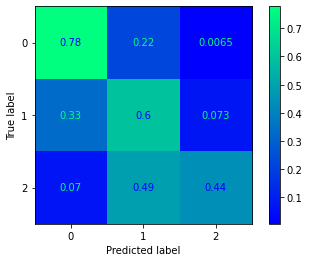

              precision    recall  f1-score   support

        -1.0       0.73      0.78      0.75       153
         0.0       0.58      0.60      0.59       124
         1.0       0.66      0.44      0.53        43
		 R2 Score: 0.24140655867246152

SVM - RBF, Train Accuracy = 0.8483189992181391, C=23.0
Test Accuracy = 0.66875


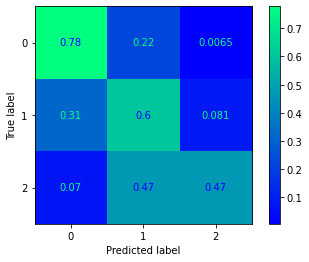

              precision    recall  f1-score   support

        -1.0       0.74      0.78      0.76       153
         0.0       0.59      0.60      0.60       124
         1.0       0.65      0.47      0.54        43
		 R2 Score: 0.2540497826945871



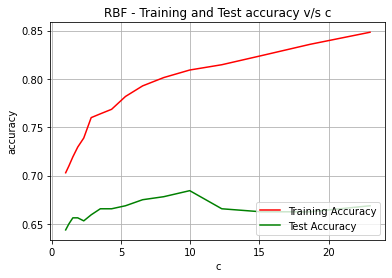

SVM - Poly, Train Accuracy = 0.6012509773260359, C=0.1
Test Accuracy = 0.58125


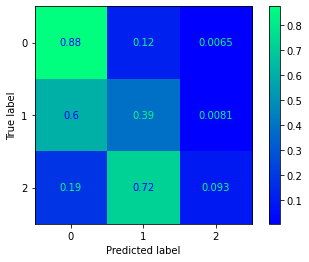

              precision    recall  f1-score   support

        -1.0       0.62      0.88      0.72       153
         0.0       0.49      0.39      0.43       124
         1.0       0.67      0.09      0.16        43
		 R2 Score: -0.017779533781114187

SVM - Poly, Train Accuracy = 0.6364347146207975, C=0.151332195791627
Test Accuracy = 0.58125


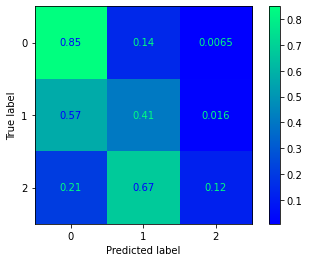

              precision    recall  f1-score   support

        -1.0       0.62      0.85      0.72       153
         0.0       0.50      0.41      0.45       124
         1.0       0.62      0.12      0.20        43
		 R2 Score: -0.036744369814302624

SVM - Poly, Train Accuracy = 0.6559812353401094, C=0.22901433483115327
Test Accuracy = 0.59375


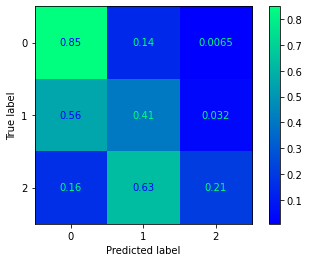

              precision    recall  f1-score   support

        -1.0       0.63      0.85      0.72       153
         0.0       0.51      0.41      0.46       124
         1.0       0.64      0.21      0.32        43
		 R2 Score: 0.026471750296325536

SVM - Poly, Train Accuracy = 0.6724003127443315, C=0.3465724215775732
Test Accuracy = 0.609375


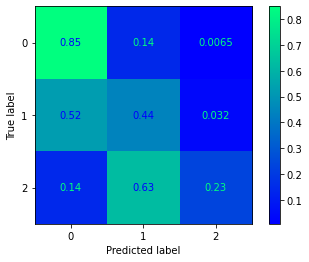

              precision    recall  f1-score   support

        -1.0       0.65      0.85      0.73       153
         0.0       0.53      0.44      0.48       124
         1.0       0.67      0.23      0.34        43
		 R2 Score: 0.07704464638482811

SVM - Poly, Train Accuracy = 0.6942924159499609, C=0.524475655581556
Test Accuracy = 0.621875


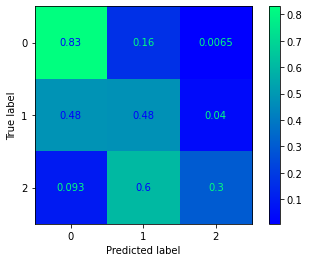

              precision    recall  f1-score   support

        -1.0       0.66      0.83      0.74       153
         0.0       0.54      0.48      0.50       124
         1.0       0.68      0.30      0.42        43
		 R2 Score: 0.14026076649545638

SVM - Poly, Train Accuracy = 0.7161845191555903, C=0.7937005259840996
Test Accuracy = 0.6125


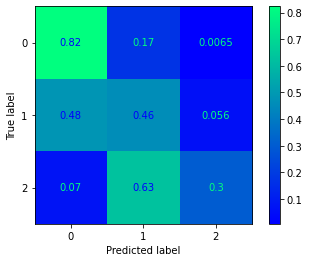

              precision    recall  f1-score   support

        -1.0       0.67      0.82      0.74       153
         0.0       0.52      0.46      0.49       124
         1.0       0.62      0.30      0.41        43
		 R2 Score: 0.14026076649545638

SVM - Poly, Train Accuracy = 0.7208756841282252, C=1.201124433981431
Test Accuracy = 0.625


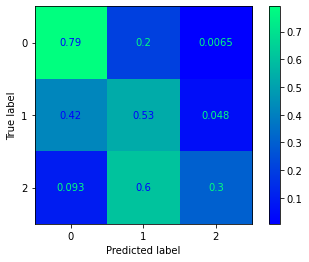

              precision    recall  f1-score   support

        -1.0       0.68      0.79      0.73       153
         0.0       0.54      0.53      0.53       124
         1.0       0.65      0.30      0.41        43
		 R2 Score: 0.14658237850651912

SVM - Poly, Train Accuracy = 0.7302580140734949, C=1.8176879801338506
Test Accuracy = 0.64375


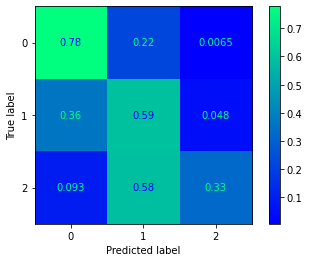

              precision    recall  f1-score   support

        -1.0       0.71      0.78      0.74       153
         0.0       0.56      0.59      0.57       124
         1.0       0.67      0.33      0.44        43
		 R2 Score: 0.1845120505728961

SVM - Poly, Train Accuracy = 0.7326035965598123, C=2.7507471329770294
Test Accuracy = 0.6375


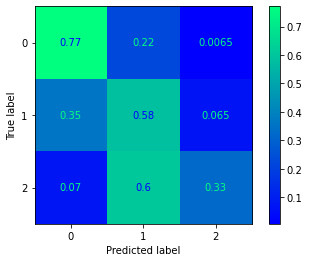

              precision    recall  f1-score   support

        -1.0       0.72      0.77      0.74       153
         0.0       0.55      0.58      0.56       124
         1.0       0.61      0.33      0.42        43
		 R2 Score: 0.19083366258395895

SVM - Poly, Train Accuracy = 0.7412040656763096, C=4.162766037009366
Test Accuracy = 0.646875


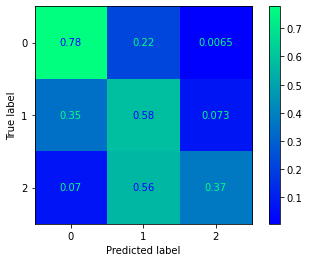

              precision    recall  f1-score   support

        -1.0       0.72      0.78      0.75       153
         0.0       0.56      0.58      0.57       124
         1.0       0.62      0.37      0.46        43
		 R2 Score: 0.2097984986171474

SVM - Poly, Train Accuracy = 0.7490226739640344, C=6.2996052494743635
Test Accuracy = 0.646875


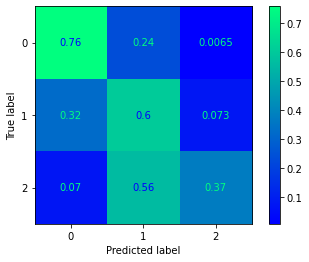

              precision    recall  f1-score   support

        -1.0       0.73      0.76      0.74       153
         0.0       0.56      0.60      0.58       124
         1.0       0.62      0.37      0.46        43
		 R2 Score: 0.2097984986171474

SVM - Poly, Train Accuracy = 0.7677873338545739, C=9.533330950234157
Test Accuracy = 0.65


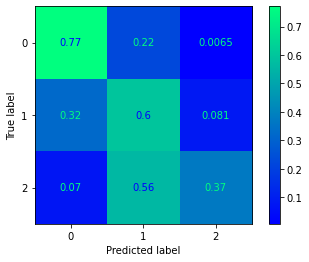

              precision    recall  f1-score   support

        -1.0       0.73      0.77      0.75       153
         0.0       0.56      0.60      0.58       124
         1.0       0.59      0.37      0.46        43
		 R2 Score: 0.21612011062821024

SVM - Poly, Train Accuracy = 0.781078967943706, C=14.426999059072134
Test Accuracy = 0.640625


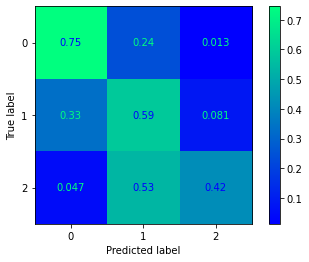

              precision    recall  f1-score   support

        -1.0       0.73      0.75      0.74       153
         0.0       0.55      0.59      0.57       124
         1.0       0.60      0.42      0.49        43
		 R2 Score: 0.1971552745950217

SVM - Poly, Train Accuracy = 0.799061767005473, C=21.832694462931222
Test Accuracy = 0.65


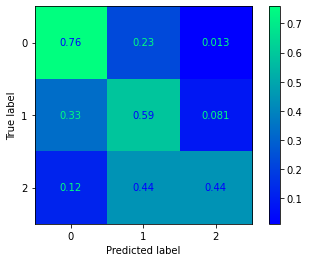

              precision    recall  f1-score   support

        -1.0       0.72      0.76      0.74       153
         0.0       0.57      0.59      0.58       124
         1.0       0.61      0.44      0.51        43
		 R2 Score: 0.15922560252864482

SVM - Poly, Train Accuracy = 0.8045347928068803, C=33.039895931230774
Test Accuracy = 0.646875


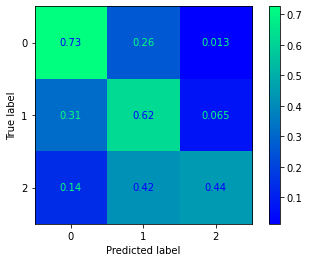

              precision    recall  f1-score   support

        -1.0       0.71      0.73      0.72       153
         0.0       0.57      0.62      0.59       124
         1.0       0.66      0.44      0.53        43
		 R2 Score: 0.13393915448439353

SVM - Poly, Train Accuracy = 0.8123534010946052, C=50.0
Test Accuracy = 0.65


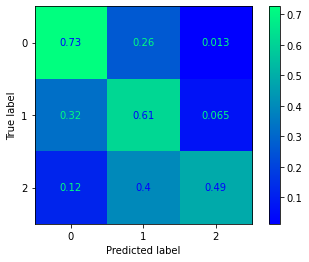

              precision    recall  f1-score   support

        -1.0       0.71      0.73      0.72       153
         0.0       0.57      0.61      0.59       124
         1.0       0.68      0.49      0.57        43
		 R2 Score: 0.15922560252864482



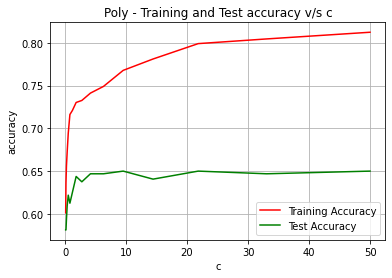

In [910]:
c_svm_linear = np.geomspace(0.06, 0.4, num=num_of_different_c)
c_svm_rbf = np.geomspace(1, 23, num=num_of_different_c)
c_svm_poly = np.geomspace(0.1, 50, num=num_of_different_c)

train_and_plot(X_train, y_train, X_test, y_test, c_svm_linear, c_svm_rbf, c_svm_poly)